# Cyclistic Case Study

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import seaborn as sns

import pickle
import itertools 

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve,\
auc

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, test_proportions_2indep

pd.set_option('display.max_columns', None)

## Load Datasets

In [5]:
jul_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202207-divvy-tripdata.csv')
aug_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202208-divvy-tripdata.csv')
sep_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202209-divvy-publictripdata.csv')
oct_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202210-divvy-tripdata.csv')
nov_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202211-divvy-tripdata.csv')
dec_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202212-divvy-tripdata.csv')
jan_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202301-divvy-tripdata.csv')
feb_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202302-divvy-tripdata.csv')
mar_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202303-divvy-tripdata.csv')
apr_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202304-divvy-tripdata.csv')
may_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202305-divvy-tripdata.csv')
jun_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202306-divvy-tripdata.csv')
jun_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202206-divvy-tripdata.csv')
may_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202205-divvy-tripdata.csv')
apr_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202204-divvy-tripdata.csv')
mar_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202203-divvy-tripdata.csv')
feb_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202202-divvy-tripdata.csv')
jan_22_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202201-divvy-tripdata.csv')
dec_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202112-divvy-tripdata.csv')
nov_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202111-divvy-tripdata.csv')
oct_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202110-divvy-tripdata.csv')
sep_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202109-divvy-tripdata.csv')
aug_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202108-divvy-tripdata.csv')
jul_21_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202107-divvy-tripdata.csv')
jul_23_df = pd.read_csv('/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic/202307-divvy-tripdata.csv')

In [6]:
# Combine one quarter of datasets into one dataset

df0 = pd.concat([apr_23_df, may_23_df, jun_23_df],axis=0,ignore_index=True)

In [7]:
# Combine entire year of datasets into one dataset

df2 = pd.concat([jul_22_df, aug_22_df, sep_22_df, oct_22_df, nov_22_df, dec_22_df, jan_23_df, feb_23_df, mar_23_df, apr_23_df, may_23_df, jun_23_df],axis=0,ignore_index=True)

In [8]:
# Combine two years of datasets into one dataset

df3 = pd.concat([jul_22_df, aug_22_df, sep_22_df, oct_22_df, nov_22_df, dec_22_df, jan_23_df, feb_23_df, mar_23_df, apr_23_df, may_23_df, jun_23_df,jun_22_df,may_22_df,apr_22_df,
mar_22_df,feb_22_df,jan_22_df,dec_21_df,nov_21_df,oct_21_df,sep_21_df,aug_21_df,jul_21_df],axis=0,ignore_index=True)

In [4]:
df0.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751035 entries, 0 to 1751034
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 173.7+ MB


In [6]:
df0.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,1751035,1751035,1751035,1751035,1481722,1481722,1463088,1463088,1.751035e+06,1.751035e+06,1.749001e+06,1.749001e+06,1751035
unique,1751035,3,1455137,1459948,1417,1353,1421,1356,NaN,NaN,NaN,NaN,2
top,8FE8F7D9C10E88C7,electric_bike,2023-06-30 15:49:32,2023-04-10 09:24:22,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,960903,7,12,22131,22131,22557,22557,NaN,NaN,NaN,NaN,1068339
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190384e+01,-8.764722e+01,4.190417e+01,-8.764729e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.477841e-02,2.765911e-02,6.343521e-02,9.775714e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.164000e+01,-8.787000e+01,0.000000e+00,-8.816000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188133e+01,-8.766014e+01,4.188169e+01,-8.766028e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000e+01,-8.764409e+01,4.190068e+01,-8.764410e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193057e+01,-8.762991e+01,4.193125e+01,-8.762991e+01,NaN


In [7]:
# Create separate time and date columns

df0['start_time'] = df0['started_at'].astype('str').str.rsplit(' ')
df0['start_time'] = df0['start_time'].apply(lambda x: x[-1])
df0['end_time'] = df0['ended_at'].astype('str').str.rsplit(' ')
df0['end_time'] = df0['end_time'].apply(lambda x: x[-1])

df0['end_date'] = df0['ended_at'].astype('str').str.rsplit(' ')
df0['end_date'] = df0['end_date'].apply(lambda x: x[0])
df0['start_date'] = df0['started_at'].astype('str').str.rsplit(' ')
df0['start_date'] = df0['start_date'].apply(lambda x: x[0])

df0.insert(df0.columns.get_loc("start_station_name"),"start_date",df0.pop("start_date"))
df0.insert(df0.columns.get_loc("start_station_name"),"end_date",df0.pop("end_date"))
df0.insert(df0.columns.get_loc("start_station_name"),"start_time",df0.pop("start_time"))
df0.insert(df0.columns.get_loc("start_station_name"),"end_time",df0.pop("end_time"))

In [140]:
df1 = df0.drop(columns=['started_at','ended_at'])

df1.head()

,ride_id,rideable_type,start_date,end_date,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,08:37:28,08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,11:29:02,11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,08:41:22,08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,13:31:30,13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,12:05:36,12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member


In [141]:
# Convert date and time columns to datetime dtype

df1['start_date'] = pd.to_datetime(df1['start_date'],yearfirst=True)
df1['end_date'] = pd.to_datetime(df1['end_date'],yearfirst=True)
df1['start_time'] = pd.to_datetime(df1['start_time'],format="%H:%M:%S")
df1['end_time'] = pd.to_datetime(df1['end_time'],format="%H:%M:%S")

df1.dtypes

ride_id                       object
rideable_type                 object
start_date            datetime64[ns]
end_date              datetime64[ns]
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [58]:
# Create trip duration column

df1['started_at'] = pd.to_datetime(df0['started_at'])
df1['ended_at'] = pd.to_datetime(df0['ended_at'])

df1['duration'] = df1['ended_at'] - df1['started_at']
df1.insert(df1.columns.get_loc("start_station_name"),"duration",df1.pop("duration"))

df1.head()

,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,time_of_day,start_station_name,duration,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend,started_at,ended_at
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,Sunday,2023-04-02,1,1900-01-01 08:37:28,1900-01-01 08:41:37,0 days 08:37:28,nan,0 days 00:04:09,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60,1,2023-04-02 08:37:28,2023-04-02 08:41:37
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 11:29:02,1900-01-01 11:52:12,0 days 11:29:02,nan,0 days 00:23:10,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65,0,2023-04-19 11:29:02,2023-04-19 11:52:12
2,5296BF07A2F77CB5,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 08:41:22,1900-01-01 08:43:22,0 days 08:41:22,nan,0 days 00:02:00,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66,0,2023-04-19 08:41:22,2023-04-19 08:43:22
3,40759916B76D5D52,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 13:31:30,1900-01-01 13:35:09,0 days 13:31:30,W Armitage Ave & N Sheffield Ave,0 days 00:03:39,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65,0,2023-04-19 13:31:30,2023-04-19 13:35:09
4,77A96F460101AC63,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:05:36,1900-01-01 12:10:26,0 days 12:05:36,nan,0 days 00:04:50,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65,0,2023-04-19 12:05:36,2023-04-19 12:10:26


In [146]:
# Check for null values

df1.isna().sum()

ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    269313
start_station_id      269313
end_station_name      287947
end_station_id        287947
start_lat                  0
start_lng                  0
end_lat                 2034
end_lng                 2034
member_casual              0
dtype: int64

In [12]:
# Calculate average start_lat and start_lng by start_station_id and end_lat and end_lng by end_station_id

avg_start_lats = df1.groupby(['start_station_id'])['start_lat'].mean()
avg_start_lngs = df1.groupby(['start_station_id'])['start_lng'].mean()
avg_end_lngs = df1.groupby(['end_station_id'])['end_lng'].mean()
avg_end_lats = df1.groupby(['end_station_id'])['end_lat'].mean()



print(avg_start_lats)
print(avg_start_lngs)
print(avg_end_lngs)
print(avg_end_lats)
print('Unique avg_start_lats:',len(avg_start_lats))
print('Unique avg_start_lngs:',len(avg_start_lngs))
print('Unique avg_end_lats:',len(avg_end_lats))
print('Unique avg_end_lngs:',len(avg_end_lngs))


start_station_id
021320          41.889861
1011            41.922208
1012            41.805031
1013            41.885656
1017            41.977793
                  ...    
chargingstx1    41.918362
chargingstx2    41.932376
chargingstx3    41.884394
chargingstx4    41.885512
chargingstx5    41.943326
Name: start_lat, Length: 1353, dtype: float64
start_station_id
021320         -87.680200
1011           -87.787528
1012           -87.609146
1013           -87.725923
1017           -87.718884
                  ...    
chargingstx1   -87.652168
chargingstx2   -87.652730
chargingstx3   -87.647940
chargingstx4   -87.652347
chargingstx5   -87.670711
Name: start_lng, Length: 1353, dtype: float64
end_station_id
021320         -87.680169
1011           -87.787579
1013           -87.727958
1017           -87.718827
1018           -87.737171
                  ...    
chargingstx1   -87.652183
chargingstx2   -87.652705
chargingstx3   -87.648627
chargingstx4   -87.652289
chargingstx5   -87.670668
N

In [13]:
df1[df1.isna().any(axis=1)]

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,1900-01-01 08:37:28,1900-01-01 08:41:37,0 days 00:04:09,NaN,NaN,NaN,NaN,41.800000,-87.600000,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,1900-01-01 11:29:02,1900-01-01 11:52:12,0 days 00:23:10,NaN,NaN,NaN,NaN,41.870000,-87.650000,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,1900-01-01 08:41:22,1900-01-01 08:43:22,0 days 00:02:00,NaN,NaN,NaN,NaN,41.930000,-87.660000,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,1900-01-01 13:31:30,1900-01-01 13:35:09,0 days 00:03:39,NaN,NaN,NaN,NaN,41.920000,-87.650000,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:05:36,1900-01-01 12:10:26,0 days 00:04:50,NaN,NaN,NaN,NaN,41.910000,-87.650000,41.91,-87.63,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751029,CDA9ABCD7DA3AE4C,electric_bike,2023-06-23,2023-06-23,1900-01-01 06:36:30,1900-01-01 07:01:59,0 days 00:25:29,Clark St & Lincoln Ave,13179,NaN,NaN,41.915710,-87.634590,41.96,-87.63,casual
1751031,9A1685F9A39646CA,electric_bike,2023-06-29,2023-06-29,1900-01-01 19:56:44,1900-01-01 20:09:15,0 days 00:12:31,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.89,-87.61,casual
1751032,CD4CC5A60881C7AF,electric_bike,2023-06-25,2023-06-25,1900-01-01 00:27:20,1900-01-01 00:39:09,0 days 00:11:49,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.92,-87.65,casual
1751033,FF6594685CFE2056,electric_bike,2023-06-24,2023-06-24,1900-01-01 21:26:57,1900-01-01 21:28:44,0 days 00:01:47,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.89,-87.62,casual


In [147]:


print(set(df1['start_station_id']).difference(set(df1['end_station_id'])))
print(len(set(df1['start_station_id']).difference(set(df1['end_station_id']))))

print(set(df1['start_station_name']).difference(set(df1['end_station_name'])))
print(len(set(df1['start_station_name']).difference(set(df1['end_station_name']))))



{'741', '1149.0', '715', '1135.0', '1174.0', '1173.0', '1186.0', '20220', '992', '731', '716', '1241.0', '982', '679', '787', '720', '905', '845', '1061', '1071', '1077.0', '1012', '1267.0', '998', '1268.0', '953', '1188.0', '1161.0', '1029'}
29
{'Public Rack - Maplewood Ave & 63rd St', 'Public Rack - Ashland Ave & 74th St', 'Public Rack - Pittsburgh Ave & Irving Park', 'Public Rack - Harlem & Summerdale', 'Public Rack - Osceola Ave & Touhy Ave', 'Public Rack - Lake Park Ave & 44th St', 'Public Rack - Ashland Ave & 45th St  S', 'Public Rack - Prairie Ave & 85th St', 'Public Rack - 83rd Pl & Kedzie Ave N', 'Avenue L & 114th St', 'Public Rack - Marquette Rd & 67th St', 'Public Rack - Yates Blvd & Exchange Ave', 'Public Rack - Octavia Ave & Touhy Ave', 'Public Rack - Central Park Ave & Fulton Blvd', 'Public Rack - Higgins Ave & Neva Ave', 'Public Rack - Mozart & 79th', 'Public Rack - Paul Revere Elementary School', 'Public Rack - California & 82nd', 'Public Rack - Langley Ave & 49th St', 

In [148]:
# Impute null values for 'start_station_name' and 'start_station_id' using dictionaries

# One quarter's worth of data (down to about 185000 null from 269313)

df1['start_lat'] = df1['start_lat'].astype('str')
df1['start_lng'] = df1['start_lng'].astype('str')

df1['start_lat_lng'] = df1['start_lat'] + ' ' + df1['start_lng']

start_df = df1[['start_station_name','start_station_id','start_lat_lng']]

start_df.set_index('start_lat_lng', inplace=True)

df1['start_station_id'] = df1['start_station_id'].astype(str)

df1['start_station_name'] = df1['start_station_name'].astype(str)

df1 = df1.replace('nan', np.nan)

df1_nonull = df1.dropna()


# Full year's worth of data (down to 175251 null from 269313)

df2['start_lat'] = df2['start_lat'].astype('str')
df2['start_lng'] = df2['start_lng'].astype('str')

df2['start_lat_lng'] = df2['start_lat'] + ' ' + df2['start_lng']

start_df = df2[['start_station_name','start_station_id','start_lat_lng']]

start_df.set_index('start_lat_lng', inplace=True)

df2['start_station_id'] = df2['start_station_id'].astype(str)

df2['start_station_name'] = df2['start_station_name'].astype(str)

df2 = df2.replace('nan', np.nan)

df2_nonull = df2.dropna()


# Two year's worth of data (down to 173130 null from 269313)

df3['start_lat'] = df3['start_lat'].astype('str')
df3['start_lng'] = df3['start_lng'].astype('str')

df3['start_lat_lng'] = df3['start_lat'] + ' ' + df3['start_lng']

start_df = df3[['start_station_name','start_station_id','start_lat_lng']]

start_df.set_index('start_lat_lng', inplace=True)

df3['start_station_id'] = df3['start_station_id'].astype(str)

df3['start_station_name'] = df3['start_station_name'].astype(str)

df3 = df3.replace('nan', np.nan)

df3_nonull = df3.dropna()


start_latlng_dict = dict(zip(df3_nonull['start_lat_lng'], df3_nonull['start_station_id']))

print(dict(itertools.islice(start_latlng_dict.items(), 10)))
        
df1['start_station_id'] = df1['start_station_id'].fillna(df1['start_lat_lng'].map(start_latlng_dict))



startname_latlng_dict = dict(zip(df3_nonull['start_lat_lng'], df3_nonull['start_station_name']))

print(dict(itertools.islice(startname_latlng_dict.items(), 10)))
        
df1['start_station_name'] = df1['start_station_name'].fillna(df1['start_lat_lng'].map(startname_latlng_dict))



start_id_dict = dict(zip(df3_nonull['start_station_id'], df3_nonull['start_station_name']))

print(dict(itertools.islice(start_id_dict.items(), 10)))

df1['start_station_name'] = df1['start_station_name'].fillna(df1['start_station_id'].map(start_id_dict))



start_name_dict = dict(zip(df3_nonull['start_station_name'], df3_nonull['start_station_id']))

print(dict(itertools.islice(start_name_dict.items(), 10)))

df1['start_station_id'] = df1['start_station_id'].fillna(df1['start_station_name'].map(start_name_dict))


df1 = df1.replace('nan', np.nan)

print(df1.isna().sum())

display(df1.head(10))

{'41.907066 -87.667252': '13224', '41.86962075 -87.62398124': '15541', '41.891466 -87.626761': 'TA1307000117', '41.88461411 -87.64456356': '15535', '41.73366879 -87.55834222': '20239', '41.90709305 -87.6672473': '13224', '41.89239445 -87.67688513': 'TA1308000006', '41.89132655 -87.62672794': 'TA1307000117', '41.83453267 -87.63182917': '15445', '41.8713295 -87.67364767': 'TA1309000064'}
{'41.907066 -87.667252': 'Ashland Ave & Blackhawk St', '41.86962075 -87.62398124': 'Buckingham Fountain (Temp)', '41.891466 -87.626761': 'Wabash Ave & Grand Ave', '41.88461411 -87.64456356': 'Desplaines St & Randolph St', '41.73366879 -87.55834222': 'Marquette Ave & 89th St', '41.90709305 -87.6672473': 'Ashland Ave & Blackhawk St', '41.89239445 -87.67688513': 'Damen Ave & Grand Ave', '41.89132655 -87.62672794': 'Wabash Ave & Grand Ave', '41.83453267 -87.63182917': 'Wentworth Ave & 33rd St', '41.8713295 -87.67364767': 'Wolcott Ave & Polk St'}
{'13224': 'Ashland Ave & Blackhawk St', '15541': 'Buckingham Fo

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,1900-01-01 08:37:28,1900-01-01 08:41:37,0 days 00:04:09,NaN,NaN,NaN,NaN,41.8,-87.6,41.79,-87.60,member,41.8 -87.6
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,1900-01-01 11:29:02,1900-01-01 11:52:12,0 days 00:23:10,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,41.87 -87.65
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,1900-01-01 08:41:22,1900-01-01 08:43:22,0 days 00:02:00,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,41.93 -87.66
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,1900-01-01 13:31:30,1900-01-01 13:35:09,0 days 00:03:39,W Armitage Ave & N Sheffield Ave,20254.0,NaN,NaN,41.92,-87.65,41.91,-87.65,member,41.92 -87.65
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:05:36,1900-01-01 12:10:26,0 days 00:04:50,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,41.91 -87.65
5,8D6A2328E19DC168,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:17:34,1900-01-01 12:21:38,0 days 00:04:04,NaN,NaN,NaN,NaN,41.91,-87.63,41.92,-87.65,member,41.91 -87.63
6,C97BBA66E07889F9,electric_bike,2023-04-19,2023-04-19,1900-01-01 09:35:48,1900-01-01 09:45:00,0 days 00:09:12,NaN,NaN,NaN,NaN,41.93,-87.66,41.91,-87.65,member,41.93 -87.66
7,6687AD4C575FF734,electric_bike,2023-04-11,2023-04-11,1900-01-01 16:13:43,1900-01-01 16:18:41,0 days 00:04:58,NaN,NaN,NaN,NaN,42.0,-87.66,41.99,-87.66,member,42.0 -87.66
8,A8FA4F73B22BC11F,electric_bike,2023-04-11,2023-04-11,1900-01-01 16:29:24,1900-01-01 16:40:23,0 days 00:10:59,NaN,NaN,NaN,NaN,41.99,-87.66,42.00,-87.66,member,41.99 -87.66
9,81E158FE63D99994,electric_bike,2023-04-19,2023-04-19,1900-01-01 17:35:40,1900-01-01 17:36:11,0 days 00:00:31,W Washington Blvd & N Peoria St,20247.0,NaN,NaN,41.88,-87.65,41.88,-87.65,member,41.88 -87.65


In [149]:
# Impute null values for 'end_station_name' and 'end_station_id' using dictionaries


df1['end_lat'] = df1['end_lat'].astype('str')
df1['end_lng'] = df1['end_lng'].astype('str')

df1['end_lat_lng'] = df1['end_lat'] + ' ' + df1['end_lng']

end_df = df1[['end_station_name','end_station_id','end_lat_lng']]

end_df.set_index('end_lat_lng', inplace=True)

df1['end_station_id'] = df1['end_station_id'].astype(str)

df1['end_station_name'] = df1['end_station_name'].astype(str)

df1 = df1.replace('nan', np.nan)

df1_nonull = df1.dropna()


# Two year's worth of data (down to 192906 null from 287947)

df3['end_lat'] = df3['end_lat'].astype('str')
df3['end_lng'] = df3['end_lng'].astype('str')

df3['end_lat_lng'] = df3['end_lat'] + ' ' + df3['end_lng']

end_df = df3[['end_station_name','end_station_id','end_lat_lng']]

end_df.set_index('end_lat_lng', inplace=True)

df3['end_station_id'] = df3['end_station_id'].astype(str)

df3['end_station_name'] = df3['end_station_name'].astype(str)

df3 = df3.replace('nan', np.nan)

df3_nonull = df3.dropna()


end_latlng_dict = dict(zip(df3_nonull['end_lat_lng'], df3_nonull['end_station_id']))

print(dict(itertools.islice(end_latlng_dict.items(), 10)))
        
df1['end_station_id'] = df1['end_station_id'].fillna(df1['end_lat_lng'].map(end_latlng_dict))



endname_latlng_dict = dict(zip(df3_nonull['end_lat_lng'], df3_nonull['end_station_name']))

print(dict(itertools.islice(endname_latlng_dict.items(), 10)))
        
df1['end_station_name'] = df1['end_station_name'].fillna(df1['end_lat_lng'].map(endname_latlng_dict))



end_id_dict = dict(zip(df3_nonull['end_station_id'], df3_nonull['end_station_name']))

print(dict(itertools.islice(end_id_dict.items(), 10)))

df1['end_station_name'] = df1['end_station_name'].fillna(df1['end_station_id'].map(end_id_dict))



end_name_dict = dict(zip(df3_nonull['end_station_name'], df3_nonull['end_station_id']))

print(dict(itertools.islice(end_name_dict.items(), 10)))

df1['end_station_id'] = df1['end_station_id'].fillna(df1['end_station_name'].map(end_name_dict))


df1 = df1.replace('nan', np.nan)

print(df1.isna().sum())

display(df1.head(10))

{'41.88917683 -87.63850577': 'KA1503000043', '41.872773 -87.623981': '623', '41.795264 -87.596471': 'TA1307000164', '41.93625348 -87.6526621': 'TA1307000052', '41.86711778 -87.64108796': 'WL-008', '41.73681521 -87.58280128': '20231', '41.898969 -87.629912': 'TA1307000128', '41.888243 -87.63639': 'TA1305000022', '41.89858665 -87.62191523': '15529', '41.939398 -87.711561': 'KA150400009X'}
{'41.88917683 -87.63850577': 'Kingsbury St & Kinzie St', '41.872773 -87.623981': 'Michigan Ave & 8th St', '41.795264 -87.596471': 'Woodlawn Ave & 55th St', '41.93625348 -87.6526621': 'Sheffield Ave & Wellington Ave', '41.86711778 -87.64108796': 'Clinton St & Roosevelt Rd', '41.73681521 -87.58280128': 'East End Ave & 87th St', '41.898969 -87.629912': 'Dearborn Pkwy & Delaware Pl', '41.888243 -87.63639': 'Orleans St & Merchandise Mart Plaza', '41.89858665 -87.62191523': 'Mies van der Rohe Way & Chestnut St', '41.939398 -87.711561': 'Kimball Ave & Belmont Ave'}
{'KA1503000043': 'Kingsbury St & Kinzie St', 

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,1900-01-01 08:37:28,1900-01-01 08:41:37,0 days 00:04:09,NaN,NaN,NaN,NaN,41.8,-87.6,41.79,-87.6,member,41.8 -87.6,41.79 -87.6
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,1900-01-01 11:29:02,1900-01-01 11:52:12,0 days 00:23:10,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,1900-01-01 08:41:22,1900-01-01 08:43:22,0 days 00:02:00,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,1900-01-01 13:31:30,1900-01-01 13:35:09,0 days 00:03:39,W Armitage Ave & N Sheffield Ave,20254.0,NaN,NaN,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:05:36,1900-01-01 12:10:26,0 days 00:04:50,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63
5,8D6A2328E19DC168,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:17:34,1900-01-01 12:21:38,0 days 00:04:04,NaN,NaN,W Armitage Ave & N Sheffield Ave,20254.0,41.91,-87.63,41.92,-87.65,member,41.91 -87.63,41.92 -87.65
6,C97BBA66E07889F9,electric_bike,2023-04-19,2023-04-19,1900-01-01 09:35:48,1900-01-01 09:45:00,0 days 00:09:12,NaN,NaN,NaN,NaN,41.93,-87.66,41.91,-87.65,member,41.93 -87.66,41.91 -87.65
7,6687AD4C575FF734,electric_bike,2023-04-11,2023-04-11,1900-01-01 16:13:43,1900-01-01 16:18:41,0 days 00:04:58,NaN,NaN,NaN,NaN,42.0,-87.66,41.99,-87.66,member,42.0 -87.66,41.99 -87.66
8,A8FA4F73B22BC11F,electric_bike,2023-04-11,2023-04-11,1900-01-01 16:29:24,1900-01-01 16:40:23,0 days 00:10:59,NaN,NaN,NaN,NaN,41.99,-87.66,42.0,-87.66,member,41.99 -87.66,42.0 -87.66
9,81E158FE63D99994,electric_bike,2023-04-19,2023-04-19,1900-01-01 17:35:40,1900-01-01 17:36:11,0 days 00:00:31,W Washington Blvd & N Peoria St,20247.0,W Washington Blvd & N Peoria St,20247.0,41.88,-87.65,41.88,-87.65,member,41.88 -87.65,41.88 -87.65


In [96]:
df1['start_station_name'] = df1['start_station_name'].astype(str)

df1['start_station_name'].dtype

df1 = df1.replace('nan', np.nan)

df1.isna().sum()

ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    186667
start_station_id      186667
end_station_name      287947
end_station_id        287947
start_lat                  0
start_lng                  0
end_lat                 2034
end_lng                 2034
member_casual              0
start_lat_lng              0
dtype: int64

In [150]:
# Convert start and end lats and lngs back to float dtype

df1['end_lat'] = df1['end_lat'].astype('float')
df1['end_lng'] = df1['end_lng'].astype('float')
df1['start_lat'] = df1['start_lat'].astype('float')
df1['start_lng'] = df1['start_lng'].astype('float')

df3['end_lat'] = df3['end_lat'].astype('float')
df3['end_lng'] = df3['end_lng'].astype('float')
df3['start_lat'] = df3['start_lat'].astype('float')
df3['start_lng'] = df3['start_lng'].astype('float')

df1.isna().sum()

ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    173130
start_station_id      173130
end_station_name      192906
end_station_id        192906
start_lat                  0
start_lng                  0
end_lat                 2034
end_lng                 2034
member_casual              0
start_lat_lng              0
end_lat_lng                0
dtype: int64

In [151]:
# Create columns for avg start and end lats and lngs

df1['avg_end_lat'] = df1.groupby(['end_lat_lng'])['end_lat'].transform('mean')
df1['avg_end_lng'] = df1.groupby(['end_lat_lng'])['end_lng'].transform('mean')
df1['avg_start_lat'] = df1.groupby(['start_lat_lng'])['start_lat'].transform('mean')
df1['avg_start_lng'] = df1.groupby(['start_lat_lng'])['start_lng'].transform('mean')

df3['avg_end_lat'] = df3.groupby(['end_lat_lng'])['end_lat'].transform('mean')
df3['avg_end_lng'] = df3.groupby(['end_lat_lng'])['end_lng'].transform('mean')
df3['avg_start_lat'] = df3.groupby(['start_lat_lng'])['start_lat'].transform('mean')
df3['avg_start_lng'] = df3.groupby(['start_lat_lng'])['start_lng'].transform('mean')

df1.head(20)
df3.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,954144C2F67B1932,classic_bike,7/5/22 8:12,7/5/22 8:24,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member,41.907066 -87.667252,41.88917683 -87.63850577,41.889177,-87.638506,41.907066,-87.667252
1,292E027607D218B6,classic_bike,7/26/22 12:53,7/26/22 12:55,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,41.86962075 -87.62398124,41.872773 -87.623981,41.872773,-87.623981,41.869621,-87.623981
2,57765852588AD6E0,classic_bike,7/3/22 13:58,7/3/22 14:06,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,41.86962075 -87.62398124,41.872773 -87.623981,41.872773,-87.623981,41.869621,-87.623981
3,B5B6BE44314590E6,classic_bike,7/31/22 17:44,7/31/22 18:42,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual,41.86962075 -87.62398124,41.795264 -87.596471,41.795264,-87.596471,41.869621,-87.623981
4,A4C331F2A00E79E0,classic_bike,7/13/22 19:49,7/13/22 20:15,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member,41.891466 -87.626761,41.93625348 -87.6526621,41.936253,-87.652662,41.891466,-87.626761
5,579D73BE2ED880B3,electric_bike,7/1/22 17:04,7/1/22 17:13,Desplaines St & Randolph St,15535,Clinton St & Roosevelt Rd,WL-008,41.884614,-87.644564,41.867118,-87.641088,member,41.88461411 -87.64456356,41.86711778 -87.64108796,41.867118,-87.641088,41.884614,-87.644564
6,EFE518CCEE333669,classic_bike,7/18/22 18:11,7/18/22 18:22,Marquette Ave & 89th St,20239,East End Ave & 87th St,20231,41.733669,-87.558342,41.736815,-87.582801,member,41.73366879 -87.55834222,41.73681521 -87.58280128,41.736815,-87.582801,41.733669,-87.558342
7,315FEBB7B3F6D2EA,classic_bike,7/28/22 20:38,7/28/22 21:09,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,casual,41.891466 -87.626761,41.898969 -87.629912,41.898969,-87.629912,41.891466,-87.626761
8,EE3C4A1E66766B56,classic_bike,7/10/22 22:55,7/10/22 23:01,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,member,41.891466 -87.626761,41.898969 -87.629912,41.898969,-87.629912,41.891466,-87.626761
9,1EE6C93A547A187C,electric_bike,7/10/22 9:35,7/10/22 9:47,Ashland Ave & Blackhawk St,13224,Orleans St & Merchandise Mart Plaza,TA1305000022,41.907093,-87.667247,41.888243,-87.636390,member,41.90709305 -87.6672473,41.888243 -87.63639,41.888243,-87.636390,41.907093,-87.667247


In [152]:
# Impute null values for 'end_lat' and 'end_lng' with average lat/lng values using dictionaries

# Brought down to 2024 null from 2034)

df1_nonull = df1.dropna()
df3_nonull = df3.dropna()

end_lat_dict = df3_nonull.groupby(['end_station_id'])['avg_end_lat'].mean().to_dict()

print(dict(itertools.islice(end_lat_dict.items(), 10)))

df1['end_lat'] = df1['end_lat'].fillna(df1['end_station_id'].map(end_lat_dict))


end_lng_dict = df3_nonull.groupby(['end_station_id'])['avg_end_lng'].mean().to_dict()

print(dict(itertools.islice(end_lng_dict.items(), 10)))

df1['end_lng'] = df1['end_lng'].fillna(df1['end_station_id'].map(end_lng_dict))


df1 = df1.replace('nan', np.nan)

print(df1.isna().sum())

display(df1.head(10))

{'021320': 41.889937183409785, '1011': 41.92045680448485, '1012': 41.81, '1013': 41.89, '1015': 41.99, '1016': 41.99, '1017': 41.97926255466667, '1018': 41.929694285714284, '1019': 41.93065648397059, '1020': 41.88050528769231}
{'021320': -87.68008923090113, '1011': -87.7894924669394, '1012': -87.61, '1013': -87.73, '1015': -87.71999999999998, '1016': -87.72, '1017': -87.71963408191665, '1018': -87.73939371428571, '1019': -87.73894169755881, '1020': -87.720495494}
ride_id                    0
rideable_type              0
start_date                 0
end_date                   0
start_time                 0
end_time                   0
duration                   0
start_station_name    173130
start_station_id      173130
end_station_name      192906
end_station_id        192906
start_lat                  0
start_lng                  0
end_lat                 2024
end_lng                 2024
member_casual              0
start_lat_lng              0
end_lat_lng                0
avg_end_la

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,1900-01-01 08:37:28,1900-01-01 08:41:37,0 days 00:04:09,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,1900-01-01 11:29:02,1900-01-01 11:52:12,0 days 00:23:10,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,1900-01-01 08:41:22,1900-01-01 08:43:22,0 days 00:02:00,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,1900-01-01 13:31:30,1900-01-01 13:35:09,0 days 00:03:39,W Armitage Ave & N Sheffield Ave,20254.0,NaN,NaN,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:05:36,1900-01-01 12:10:26,0 days 00:04:50,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65
5,8D6A2328E19DC168,electric_bike,2023-04-19,2023-04-19,1900-01-01 12:17:34,1900-01-01 12:21:38,0 days 00:04:04,NaN,NaN,W Armitage Ave & N Sheffield Ave,20254.0,41.91,-87.63,41.92,-87.65,member,41.91 -87.63,41.92 -87.65,41.92,-87.65,41.91,-87.63
6,C97BBA66E07889F9,electric_bike,2023-04-19,2023-04-19,1900-01-01 09:35:48,1900-01-01 09:45:00,0 days 00:09:12,NaN,NaN,NaN,NaN,41.93,-87.66,41.91,-87.65,member,41.93 -87.66,41.91 -87.65,41.91,-87.65,41.93,-87.66
7,6687AD4C575FF734,electric_bike,2023-04-11,2023-04-11,1900-01-01 16:13:43,1900-01-01 16:18:41,0 days 00:04:58,NaN,NaN,NaN,NaN,42.00,-87.66,41.99,-87.66,member,42.0 -87.66,41.99 -87.66,41.99,-87.66,42.00,-87.66
8,A8FA4F73B22BC11F,electric_bike,2023-04-11,2023-04-11,1900-01-01 16:29:24,1900-01-01 16:40:23,0 days 00:10:59,NaN,NaN,NaN,NaN,41.99,-87.66,42.00,-87.66,member,41.99 -87.66,42.0 -87.66,42.00,-87.66,41.99,-87.66
9,81E158FE63D99994,electric_bike,2023-04-19,2023-04-19,1900-01-01 17:35:40,1900-01-01 17:36:11,0 days 00:00:31,W Washington Blvd & N Peoria St,20247.0,W Washington Blvd & N Peoria St,20247.0,41.88,-87.65,41.88,-87.65,member,41.88 -87.65,41.88 -87.65,41.88,-87.65,41.88,-87.65


In [110]:
# Examine remaining null counts in df1 by month

display(df1[(df1['end_lng'].isna()) & (df1['end_lat'].isna())])

print('APR23 Null Counts:\n',apr_23_df.isna().sum())
print('\n')
print('APR23 Total Trips:',len(apr_23_df))
print('Start Station Name/ID Null % of Total:',round((63814/len(apr_23_df))*100,2),'%')
print('End Station Name/ID Null % of Total:',round((68630/len(apr_23_df))*100,2),'%')
print('End Station Lat/Lng Null % of Total:',round((435/len(apr_23_df))*100,2),'%')
print('\n')
print('MAY23 Null Counts:\n',may_23_df.isna().sum())
print('\n')
print('MAY23 Total Trips:',len(may_23_df))
print('Start Station Name/ID Null % of Total:',round((89240/len(may_23_df))*100,2),'%')
print('End Station Name/ID Null % of Total:',round((95267/len(may_23_df))*100,2),'%')
print('End Station Lat/Lng Null % of Total:',round((710/len(may_23_df))*100,2),'%')
print('\n')
print('JUN23 Null Counts:\n',jun_23_df.isna().sum())
print('\n')
print('JUN23 Total Trips:',len(jun_23_df))
print('Start Station Name/ID Null % of Total:',round((116259/len(jun_23_df))*100,2),'%')
print('End Station Name/ID Null % of Total:',round((124050/len(jun_23_df))*100,2),'%')
print('End Station Lat/Lng Null % of Total:',round((889/len(jun_23_df))*100,2),'%')

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
66212,C0D866D60D247389,docked_bike,2023-04-29,2023-05-01,1900-01-01 19:53:48,1900-01-01 04:48:13,-1 days +08:54:25,St. Louis Ave & Fullerton Ave,KA1504000090,NaN,NaN,41.924816,-87.714495,NaN,NaN,casual,41.924816 -87.714495,nan nan,NaN,NaN,41.924816,-87.714495
66310,667C60C2E29B3527,docked_bike,2023-04-11,2023-04-14,1900-01-01 11:57:32,1900-01-01 15:35:22,0 days 03:37:50,Racine Ave & 61st St,562,NaN,NaN,41.783189,-87.654372,NaN,NaN,casual,41.783189 -87.654372,nan nan,NaN,NaN,41.783189,-87.654372
67655,6931AA8C6820608F,docked_bike,2023-04-13,2023-04-13,1900-01-01 18:07:14,1900-01-01 18:14:14,0 days 00:07:00,Winthrop Ave & Lawrence Ave,TA1308000021,NaN,NaN,41.968812,-87.657659,NaN,NaN,casual,41.968812 -87.657659,nan nan,NaN,NaN,41.968812,-87.657659
67745,78DBBD82B3A9B783,classic_bike,2023-04-28,2023-04-29,1900-01-01 16:29:43,1900-01-01 17:29:35,0 days 00:59:52,Halsted St & Wrightwood Ave,TA1309000061,NaN,NaN,41.929143,-87.649077,NaN,NaN,member,41.929143 -87.649077,nan nan,NaN,NaN,41.929143,-87.649077
67795,30EB784FB59361E9,classic_bike,2023-04-15,2023-04-16,1900-01-01 19:35:51,1900-01-01 20:35:46,0 days 00:59:55,Stony Island Ave & 90th St,20236,NaN,NaN,41.731395,-87.585744,NaN,NaN,casual,41.73139494330236 -87.58574366569519,nan nan,NaN,NaN,41.731395,-87.585744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750832,C7B545B3BE23D680,classic_bike,2023-06-11,2023-06-12,1900-01-01 00:03:01,1900-01-01 01:02:48,0 days 00:59:47,Leavitt St & Addison St,KA1504000143,NaN,NaN,41.946655,-87.683359,NaN,NaN,casual,41.946655 -87.683359,nan nan,NaN,NaN,41.946655,-87.683359
1750906,6445BF0AC9810E43,docked_bike,2023-06-23,2023-06-23,1900-01-01 18:34:00,1900-01-01 19:07:33,0 days 00:33:33,Leavitt St & Addison St,KA1504000143,NaN,NaN,41.946655,-87.683359,NaN,NaN,casual,41.946655 -87.683359,nan nan,NaN,NaN,41.946655,-87.683359
1750913,135D6E16C06A802E,classic_bike,2023-06-19,2023-06-20,1900-01-01 14:02:04,1900-01-01 15:01:43,0 days 00:59:39,Paulina St & Montrose Ave,TA1309000021,NaN,NaN,41.961507,-87.671387,NaN,NaN,casual,41.961507 -87.671387,nan nan,NaN,NaN,41.961507,-87.671387
1751019,AF036A8A8EBF731E,docked_bike,2023-06-10,2023-06-15,1900-01-01 11:56:08,1900-01-01 04:57:09,-1 days +17:01:01,Clark St & Lincoln Ave,13179,NaN,NaN,41.915689,-87.634600,NaN,NaN,casual,41.915689 -87.6346,nan nan,NaN,NaN,41.915689,-87.634600


APR23 Null Counts:
 ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    63814
start_station_id      63814
end_station_name      68630
end_station_id        68630
start_lat                 0
start_lng                 0
end_lat                 435
end_lng                 435
member_casual             0
dtype: int64


APR23 Total Trips: 426590
Start Station Name/ID Null % of Total: 14.96 %
End Station Name/ID Null % of Total: 16.09 %
End Station Lat/Lng Null % of Total: 0.1 %


MAY23 Null Counts:
 ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    89240
start_station_id      89240
end_station_name      95267
end_station_id        95267
start_lat                 0
start_lng                 0
end_lat                 710
end_lng                 710
member_casual             0
dtype: int64


MAY23 Total Trips: 604827
Start Station

In [9]:
# Define function to write a pickle to save the dataset so that code does not need to be run again 
# if the kernel is interrupted/restarted

def write_pickle(path, object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: an object you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the object in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(object, to_write)

In [10]:
# Define function to read the pickle that was written so that the object can be accessed upon kernel restart

def read_pickle(path, saved_object_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_object_name: filename of pickled object you want to read in

    Out: 
        object: the pickled object
    '''
    with open(path + saved_object_name + '.pickle', 'rb') as to_read:
        object = pickle.load(to_read)

    return object

In [11]:
# Define file path for the pickle

path = '/Users/chris/Desktop/Certs/Google Data Analytics Cert/Case Study 1 Cyclistic'

In [59]:
# Write pickle

write_pickle(path, df1, 'df1')

In [ ]:
# Write pickle

write_pickle(path, df1_nonull, 'df1_nonull')

In [ ]:
# Write pickle

write_pickle(path, df3_nonull, 'df3_nonull')

In [12]:
# Read pickle

df1 = read_pickle(path, 'df1')

In [60]:
# Inspect first few rows of df1 to verify state of dataset

df1.head()

,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,time_of_day,start_station_name,duration,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend,started_at,ended_at
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,Sunday,2023-04-02,1,1900-01-01 08:37:28,1900-01-01 08:41:37,0 days 08:37:28,nan,0 days 00:04:09,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60,1,2023-04-02 08:37:28,2023-04-02 08:41:37
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 11:29:02,1900-01-01 11:52:12,0 days 11:29:02,nan,0 days 00:23:10,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65,0,2023-04-19 11:29:02,2023-04-19 11:52:12
2,5296BF07A2F77CB5,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 08:41:22,1900-01-01 08:43:22,0 days 08:41:22,nan,0 days 00:02:00,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66,0,2023-04-19 08:41:22,2023-04-19 08:43:22
3,40759916B76D5D52,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 13:31:30,1900-01-01 13:35:09,0 days 13:31:30,W Armitage Ave & N Sheffield Ave,0 days 00:03:39,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65,0,2023-04-19 13:31:30,2023-04-19 13:35:09
4,77A96F460101AC63,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:05:36,1900-01-01 12:10:26,0 days 12:05:36,nan,0 days 00:04:50,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65,0,2023-04-19 12:05:36,2023-04-19 12:10:26


In [11]:
# Read pickle

df3 = read_pickle(path, 'df3')

EOFError: Ran out of input

In [13]:
# Trim any extra whitespace from strings

df1.applymap(lambda x: x.strip() if type(x)==str else x)

/var/folders/gh/bhd7smwx0pnb4p234kf26pp80000gp/T/ipykernel_1021/3792940795.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1.applymap(lambda x: x.strip() if type(x)==str else x)


,ride_id,rideable_type,start_date,end_date,weekday,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,Sunday,1900-01-01 08:37:28,1900-01-01 08:41:37,4.0,nan,nan,nan,nan,nan nan,nan nan,41.800000,-87.600000,41.790000,-87.600000,member,41.8 -87.6,41.79 -87.6,41.790000,-87.600000,41.800000,-87.600000
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 11:29:02,1900-01-01 11:52:12,23.0,nan,nan,nan,nan,nan nan,nan nan,41.870000,-87.650000,41.930000,-87.680000,member,41.87 -87.65,41.93 -87.68,41.930000,-87.680000,41.870000,-87.650000
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 08:41:22,1900-01-01 08:43:22,2.0,nan,nan,nan,nan,nan nan,nan nan,41.930000,-87.660000,41.930000,-87.660000,member,41.93 -87.66,41.93 -87.66,41.930000,-87.660000,41.930000,-87.660000
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 13:31:30,1900-01-01 13:35:09,3.0,W Armitage Ave & N Sheffield Ave,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.920000,-87.650000,41.910000,-87.650000,member,41.92 -87.65,41.91 -87.65,41.910000,-87.650000,41.920000,-87.650000
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 12:05:36,1900-01-01 12:10:26,4.0,nan,nan,nan,nan,nan nan,nan nan,41.910000,-87.650000,41.910000,-87.630000,member,41.91 -87.65,41.91 -87.63,41.910000,-87.630000,41.910000,-87.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751030,D7BBF4BCBB72DA32,classic_bike,2023-06-30,2023-06-30,Friday,1900-01-01 12:58:56,1900-01-01 13:41:25,42.0,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,Fairbanks Ct & Grand Ave California Ave & Milw...,TA1305000003 13084,41.891847,-87.620580,41.922695,-87.697153,casual,41.89184737210993 -87.62058019638062,41.922695 -87.697153,41.922695,-87.697153,41.891847,-87.620580
1751031,9A1685F9A39646CA,electric_bike,2023-06-29,2023-06-29,Thursday,1900-01-01 19:56:44,1900-01-01 20:09:15,12.0,Fairbanks Ct & Grand Ave,TA1305000003,nan,nan,Fairbanks Ct & Grand Ave nan,TA1305000003 nan,41.891970,-87.620198,41.890000,-87.610000,casual,41.89197 -87.62019766666667,41.89 -87.61,41.890000,-87.610000,41.891970,-87.620198
1751032,CD4CC5A60881C7AF,electric_bike,2023-06-25,2023-06-25,Sunday,1900-01-01 00:27:20,1900-01-01 00:39:09,11.0,Clark St & Lincoln Ave,13179,W Armitage Ave & N Sheffield Ave,20254.0,Clark St & Lincoln Ave W Armitage Ave & N Shef...,13179 20254.0,41.915745,-87.634604,41.920000,-87.650000,casual,41.915745139 -87.634604335,41.92 -87.65,41.920000,-87.650000,41.915745,-87.634604
1751033,FF6594685CFE2056,electric_bike,2023-06-24,2023-06-24,Saturday,1900-01-01 21:26:57,1900-01-01 21:28:44,1.0,Fairbanks Ct & Grand Ave,TA1305000003,nan,nan,Fairbanks Ct & Grand Ave nan,TA1305000003 nan,41.891725,-87.620607,41.890000,-87.620000,casual,41.891724833333335 -87.62060683333333,41.89 -87.62,41.890000,-87.620000,41.891725,-87.620607


In [123]:
# Check summary statistics after removing nulls and extra whitespace

df1.describe(include='all')

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
count,1751035,1751035,1751035,1751035,1751035,1751035,1751035,1577905,1577905,1558129,1558129,1.751035e+06,1.751035e+06,1.749011e+06,1.749011e+06,1751035,1751035,1751035,1.749001e+06,1.749001e+06,1.751035e+06,1.751035e+06
unique,1751035,3,NaN,NaN,NaN,NaN,NaN,1560,1412,1565,1408,NaN,NaN,NaN,NaN,2,675257,14577,NaN,NaN,NaN,NaN
top,8FE8F7D9C10E88C7,electric_bike,NaN,NaN,NaN,NaN,NaN,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member,41.892278 -87.612043,41.892278 -87.612043,NaN,NaN,NaN,NaN
freq,1,960903,NaN,NaN,NaN,NaN,NaN,22131,22131,22557,22557,NaN,NaN,NaN,NaN,1068339,15138,22556,NaN,NaN,NaN,NaN
mean,NaN,NaN,2023-05-21 10:12:04.841708288,2023-05-21 10:21:33.017671936,1900-01-01 14:44:30.266188032,1900-01-01 14:54:00.892778752,0 days 00:09:30.626589988,NaN,NaN,NaN,NaN,4.190384e+01,-8.764722e+01,4.190417e+01,-8.764729e+01,NaN,NaN,NaN,4.190417e+01,-8.764729e+01,4.190384e+01,-8.764722e+01
min,NaN,NaN,2023-04-01 00:00:00,2023-04-01 00:00:00,1900-01-01 00:00:00,1900-01-01 00:00:00,-1 days +00:00:21,NaN,NaN,NaN,NaN,4.164000e+01,-8.787000e+01,0.000000e+00,-8.816000e+01,NaN,NaN,NaN,0.000000e+00,-8.816000e+01,4.164000e+01,-8.787000e+01
25%,NaN,NaN,2023-05-02 00:00:00,2023-05-02 00:00:00,1900-01-01 11:24:29.500000,1900-01-01 11:35:27,0 days 00:05:33,NaN,NaN,NaN,NaN,4.188133e+01,-8.766014e+01,4.188169e+01,-8.766028e+01,NaN,NaN,NaN,4.188169e+01,-8.766028e+01,4.188133e+01,-8.766014e+01
50%,NaN,NaN,2023-05-25 00:00:00,2023-05-25 00:00:00,1900-01-01 15:38:47,1900-01-01 15:52:21,0 days 00:09:57,NaN,NaN,NaN,NaN,4.190000e+01,-8.764409e+01,4.190068e+01,-8.764410e+01,NaN,NaN,NaN,4.190068e+01,-8.764410e+01,4.190000e+01,-8.764409e+01
75%,NaN,NaN,2023-06-12 00:00:00,2023-06-12 00:00:00,1900-01-01 18:16:43,1900-01-01 18:29:42,0 days 00:17:50,NaN,NaN,NaN,NaN,4.193057e+01,-8.762991e+01,4.193125e+01,-8.762991e+01,NaN,NaN,NaN,4.193125e+01,-8.762991e+01,4.193057e+01,-8.762991e+01
max,NaN,NaN,2023-06-30 00:00:00,2023-07-10 00:00:00,1900-01-01 23:59:59,1900-01-01 23:59:59,0 days 22:52:57,NaN,NaN,NaN,NaN,4.207000e+01,-8.752000e+01,4.211000e+01,0.000000e+00,NaN,NaN,NaN,4.211000e+01,0.000000e+00,4.207000e+01,-8.752000e+01


In [136]:
# Check unique values of start and end station names to see if there are any misspellings

df1_ssns = set(df1['start_station_name'].dropna())
display(sorted(df1_ssns))
df1_esns = set(df1['end_station_name'].dropna())
display(sorted(df1_esns))

['10101 S Stony Island Ave',
 '111th St - Morgan Park Metra',
 '2112 W Peterson Ave',
 '410',
 '532 E 43rd St',
 '63rd St Beach',
 '83rd St (Avalon Park) Metra',
 '900 W Harrison St',
 'Aberdeen St & Jackson Blvd',
 'Aberdeen St & Monroe St',
 'Aberdeen St & Randolph St',
 'Ada St & 113th St',
 'Ada St & 117th St',
 'Ada St & 79th St',
 'Ada St & 95th St',
 'Ada St & Washington Blvd',
 'Adler Planetarium',
 'Albany Ave & 103rd St',
 'Albany Ave & 111th St - NW',
 'Albany Ave & 16th St',
 'Albany Ave & 26th St',
 'Albany Ave & 63rd St',
 'Albany Ave & Belmont Ave',
 'Albany Ave & Bloomingdale Ave',
 'Albany Ave & Douglas Blvd',
 'Albany Ave & Montrose Ave',
 'Altgeld Gardens',
 'Archer (Damen) Ave & 37th St',
 'Archer Ave & 43rd St',
 'Artesian Ave & 55th St',
 'Artesian Ave & Hubbard St',
 'Ashland Ave & 13th St',
 'Ashland Ave & 45th St',
 'Ashland Ave & 46th St',
 'Ashland Ave & 50th St',
 'Ashland Ave & 63rd St',
 'Ashland Ave & 66th St',
 'Ashland Ave & 71st St',
 'Ashland Ave & 74

['2112 W Peterson Ave',
 '410',
 '532 E 43rd St',
 '63rd St Beach',
 '900 W Harrison St',
 'Aberdeen St & Jackson Blvd',
 'Aberdeen St & Monroe St',
 'Aberdeen St & Randolph St',
 'Ada St & 113th St',
 'Ada St & 117th St',
 'Ada St & 79th St',
 'Ada St & 95th St',
 'Ada St & Washington Blvd',
 'Adler Planetarium',
 'Al Raby School',
 'Albany Ave & 16th St',
 'Albany Ave & 26th St',
 'Albany Ave & 63rd St',
 'Albany Ave & Belmont Ave',
 'Albany Ave & Bloomingdale Ave',
 'Albany Ave & Douglas Blvd',
 'Albany Ave & Montrose Ave',
 'Altgeld Gardens',
 'Archer (Damen) Ave & 37th St',
 'Archer Ave & 43rd St',
 'Archer Park',
 'Artesian Ave & 55th St',
 'Artesian Ave & Hubbard St',
 'Ashland Ave & 13th St',
 'Ashland Ave & 45th St - midblock south',
 'Ashland Ave & 50th St',
 'Ashland Ave & 63rd St',
 'Ashland Ave & 66th St',
 'Ashland Ave & 71st St',
 'Ashland Ave & 74th St',
 'Ashland Ave & 78th St',
 'Ashland Ave & Archer Ave',
 'Ashland Ave & Augusta Blvd',
 'Ashland Ave & Belle Plaine Av

In [143]:
# Check what 'temp' and '*' station names refer to

df1[(df1['start_station_name'] == 'Fort Dearborn Dr & 31st St') | (df1['start_station_name'] == 'Fort Dearborn Dr & 31st St*')]
df1[df1['start_station_name'] == 'Green St & Randolph St*']

,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
213016,94075DFAD35807E6,electric_bike,2023-04-21,2023-04-21,1900-01-01 13:17:02,1900-01-01 13:17:24,0 days 00:00:22,Green St & Randolph St*,chargingstx3,W Washington Blvd & N Peoria St,20247.0,41.883654,-87.648550,41.880000,-87.650000,member,41.883653641 -87.648550272,41.88 -87.65,41.880000,-87.650000,41.883654,-87.648550
213017,2A632FF5A4499C3D,electric_bike,2023-04-21,2023-04-21,1900-01-01 13:16:28,1900-01-01 13:16:51,0 days 00:00:23,Green St & Randolph St*,chargingstx3,W Washington Blvd & N Peoria St,20247.0,41.883725,-87.648534,41.880000,-87.650000,member,41.883724928 -87.648533702,41.88 -87.65,41.880000,-87.650000,41.883725,-87.648534
213040,041B0D64DB9DF032,electric_bike,2023-04-15,2023-04-15,1900-01-01 19:28:02,1900-01-01 19:28:14,0 days 00:00:12,Green St & Randolph St*,chargingstx3,N Green St & W Lake St,20246.0,41.891572,-87.648335,41.890000,-87.650000,casual,41.89157216666667 -87.6483345,41.89 -87.65,41.890000,-87.650000,41.891572,-87.648335
213041,634BF421B9FCE9E7,electric_bike,2023-04-15,2023-04-15,1900-01-01 13:33:24,1900-01-01 13:33:45,0 days 00:00:21,Green St & Randolph St*,chargingstx3,W Washington Blvd & N Peoria St,20247.0,41.883201,-87.648742,41.880000,-87.650000,casual,41.883200645 -87.648742437,41.88 -87.65,41.880000,-87.650000,41.883201,-87.648742
213046,2358B2238468D081,electric_bike,2023-04-05,2023-04-05,1900-01-01 19:44:37,1900-01-01 19:44:58,0 days 00:00:21,Green St & Randolph St*,chargingstx3,N Green St & W Lake St,20246.0,41.886793,-87.648108,41.890000,-87.650000,member,41.88679333333333 -87.64810833333334,41.89 -87.65,41.890000,-87.650000,41.886793,-87.648108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684418,30A96F764C6DE701,electric_bike,2023-06-16,2023-06-16,1900-01-01 13:07:48,1900-01-01 13:22:43,0 days 00:14:55,Green St & Randolph St*,chargingstx3,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,41.883556,-87.648553,41.901315,-87.677409,member,41.88355633333333 -87.64855266666666,41.901315 -87.677409,41.901315,-87.677409,41.883556,-87.648553
1684425,206F6006A377F971,classic_bike,2023-06-15,2023-06-15,1900-01-01 16:20:40,1900-01-01 16:53:21,0 days 00:32:41,Green St & Randolph St*,chargingstx3,Mies van der Rohe Way & Chestnut St,15529,41.883602,-87.648627,41.898587,-87.621915,casual,41.883601657275165 -87.64862671494483,41.8985866514 -87.6219152258,41.898587,-87.621915,41.883602,-87.648627
1684432,0530497AB0369CB0,electric_bike,2023-06-14,2023-06-14,1900-01-01 23:16:44,1900-01-01 23:27:52,0 days 00:11:08,Green St & Randolph St*,chargingstx3,Honore St & Division St,TA1305000034,41.883535,-87.648497,41.903119,-87.673935,casual,41.883534833333336 -87.648497,41.903119 -87.673935,41.903119,-87.673935,41.883535,-87.648497
1684438,9398C8873AD5478D,classic_bike,2023-06-15,2023-06-15,1900-01-01 16:20:57,1900-01-01 16:53:48,0 days 00:32:51,Green St & Randolph St*,chargingstx3,Mies van der Rohe Way & Chestnut St,15529,41.883602,-87.648627,41.898587,-87.621915,casual,41.883601657275165 -87.64862671494483,41.8985866514 -87.6219152258,41.898587,-87.621915,41.883602,-87.648627


In [198]:
# Check start station id -> start station name dictionary for keys with multiple values

# There is no more than one start station name assigned to each start station id

df1_nonull = df1.dropna()

df1_start_id_dict = dict(zip(df1_nonull['start_station_id'], df1_nonull['start_station_name']))

ssid_mult_names = {}
for id, name in df1_start_id_dict.items():
    if len([name]) > 1:
        ssid_mult_names[id] = name

print(ssid_mult_names,len([name]))

print(df1_start_id_dict)


{} 1
{'20247.0': 'W Washington Blvd & N Peoria St', '431': 'Western Ave & Grace St', '20257.0': 'N Southport Ave & W Newport Ave', '202480.0': 'Hampden Ct & Diversey Ave', '361': 'Kenosha & Wellington', '436': 'Kedzie Ave & George St', '441': 'Virginia Ave & Catalpa Ave', '506': 'Public Rack - Lawndale Ave & Diversey Ave', '20249.0': 'N Clark St & W Elm St', '333.0': 'Kildare & Cermak', '20254.0': 'W Armitage Ave & N Sheffield Ave', '337': 'Hoyne Ave & 34th St', '20252.0': 'W Oakdale Ave & N Broadway', '496': 'Kedvale Ave & Avondale Ave', '445': 'Western Ave & Gunnison St', '430': 'Troy St & Grace St', '749': 'Evans Ave & 63rd St', '768': 'Hyde Park Blvd & 55th St', '20.0': 'Damen Ave & Wabansia Ave', '355': 'Central Ave & Parker Ave', '438': 'Western Ave & Berteau Ave', '428': 'Milwaukee Ave & Fullerton Ave', '20256.0': 'N Sheffield Ave & W Wellington Ave', '23002': 'Lincoln Ave & Byron St', '752': 'Kimbark Ave & 63rd St', '20253.0': 'N Paulina St & Lincoln Ave', '472': 'Elston Ave & 

In [187]:
# Check end station id -> end station name dictionary for keys with multiple values

# There is no more than one start station name assigned to each start station id

df1_nonull = df1.dropna()

df1_end_id_dict = dict(zip(df1_nonull['end_station_id'], df1_nonull['end_station_name']))

ssid_mult_names = {}
for id, name in df1_end_id_dict.items():
    if len([name]) > 1:
        ssid_mult_names[id] = name

print(ssid_mult_names,len([name]))

print(df1_end_id_dict)


{} 1
{'20247.0': 'W Washington Blvd & N Peoria St', '20249.0': 'N Clark St & W Elm St', '431': 'Western Ave & Grace St', '20257.0': 'N Southport Ave & W Newport Ave', '20252.0': 'W Oakdale Ave & N Broadway', '436': 'Kedzie Ave & George St', '361': 'Kenosha & Wellington', '485': 'Sacramento Ave & Devon Ave', '506': 'Lawndale Ave & Diversey Ave', '522': 'Lawndale Ave & Polk St', '20254.0': 'W Armitage Ave & N Sheffield Ave', '337': 'Hoyne Ave & 34th St', '23001': 'Elizabeth St & Randolph St', '445': 'Western Ave & Gunnison St', '202480.0': 'Hampden Ct & Diversey Ave', '752': 'Kimbark Ave & 63rd St', '951': 'Public Rack - Woodlawn Ave & 63rd St - NE', '355': 'Central Ave & Parker Ave', '434': 'Albany Ave & Belmont Ave', '433': 'Elston Ave & Henderson St', '20255.0': 'N Damen Ave & W Chicago Ave', 'TA1306000002': 'Morgan Ave & 14th Pl', '23002': 'Lincoln Ave & Byron St', '955': 'Public Rack - Eberhart Ave & 61st St', '20.0': 'Damen Ave & Wabansia Ave', '20256.0': 'N Sheffield Ave & W Welli

In [195]:
# Check start station name -> start station id dictionary for keys with multiple values

# There is no more than one start station id assigned to each start station name and each start station name is accompanied by a ssid

ssn_notna_df = df1[df1['start_station_name'].notna()]

df1_start_name_dict = dict(zip(ssn_notna_df['start_station_name'], ssn_notna_df['start_station_id']))

ssname_no_id = {}
for name, id in df1_start_name_dict.items():
    if len([id]) < 1:
        ssname_no_id[name] = id

print(ssname_no_id,len([id]))

print(df1_start_name_dict)


{} 1
{'W Armitage Ave & N Sheffield Ave': '20254.0', 'W Washington Blvd & N Peoria St': '20247.0', 'Western Ave & Grace St': '431', 'N Clark St & W Elm St': '20249.0', 'N Southport Ave & W Newport Ave': '20257.0', 'Hampden Ct & Diversey Ave': '202480.0', 'N Green St & W Lake St': '20246.0', 'Kenosha & Wellington': '361', 'Kedzie Ave & George St': '436', 'Sacramento Ave & Devon Ave': '485', 'Virginia Ave & Catalpa Ave': '441', 'Milwaukee Ave & Fullerton Ave': '428', 'Lawndale Ave & Diversey Ave': '506', 'Kildare & Cermak': '333.0', 'N Damen Ave & W Chicago Ave': '20255.0', 'Hoyne Ave & 34th St': '337', 'W Oakdale Ave & N Broadway': '20252.0', 'Damen Ave & Wabansia Ave': '20.0', 'Narragansett & Wrightwood': '314', 'Kedvale Ave & Avondale Ave': '496', 'Western Ave & Gunnison St': '445', 'Troy St & Grace St': '430', 'Public Rack - Woodlawn Ave & 63rd St - NE': '951', 'Evans Ave & 63rd St': '749', 'Hyde Park Blvd & 55th St': '768', 'California Ave & Division St': '13256', 'Central Ave & Par

In [183]:
# Check to see if any start and end station names don't have corresponding station ids using boolean masks

# Confirmed there are none

df1_start_names_ids = df1[['start_station_name','start_station_id']]
display(df1_start_names_ids[(df1_start_names_ids['start_station_id'].isna() == True) & (df1_start_names_ids['start_station_name'].isna() == False)])

df1_end_names_ids = df1[['end_station_name','end_station_id']]
display(df1_end_names_ids[(df1_end_names_ids['end_station_id'].isna() == True) & (df1_end_names_ids['end_station_name'].isna() == False)])


,start_station_name,start_station_id


,end_station_name,end_station_id


In [19]:
# Create day of week column

df1['weekday'] = df1['start_date'].dt.day_name()
df1.insert(df1.columns.get_loc("end_date"),"weekday",df1.pop("weekday"))

df1.head()

,ride_id,rideable_type,start_date,weekday,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,Sunday,2023-04-02,1900-01-01 08:37:28,1900-01-01 08:41:37,4.0,nan,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,Wednesday,2023-04-19,1900-01-01 11:29:02,1900-01-01 11:52:12,23.0,nan,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65
2,5296BF07A2F77CB5,electric_bike,2023-04-19,Wednesday,2023-04-19,1900-01-01 08:41:22,1900-01-01 08:43:22,2.0,nan,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66
3,40759916B76D5D52,electric_bike,2023-04-19,Wednesday,2023-04-19,1900-01-01 13:31:30,1900-01-01 13:35:09,3.0,W Armitage Ave & N Sheffield Ave,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65
4,77A96F460101AC63,electric_bike,2023-04-19,Wednesday,2023-04-19,1900-01-01 12:05:36,1900-01-01 12:10:26,4.0,nan,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65


In [33]:
# Create weekend boolean column

weekend = []

for x in df1['weekday']:
    if (x == 'Saturday') | (x == 'Sunday'):
        weekend.append(1)
    else:
        weekend.append(0)

df1['weekend'] = weekend
df1.insert(df1.columns.get_loc("end_date"),"weekend",df1.pop("weekend"))

df1.head(10)

display(df1[df1['weekend'] == 1].head())
display(df1[df1['weekend'] == 0].head())
                        

,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,Sunday,2023-04-02,1,1900-01-01 08:37:28,1900-01-01 08:41:37,4.0,nan,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60,1
22,37657AF17CA22728,electric_bike,2023-04-15,Saturday,2023-04-15,1,1900-01-01 20:35:35,1900-01-01 20:38:36,3.0,nan,nan,nan,nan,nan nan,nan nan,41.95,-87.66,41.95,-87.65,member,41.95 -87.66,41.95 -87.65,41.95,-87.65,41.95,-87.66,1
23,843BDBA1059F7FBC,electric_bike,2023-04-15,Saturday,2023-04-15,1,1900-01-01 19:09:33,1900-01-01 19:16:04,6.0,N Southport Ave & W Newport Ave,20257.0,N Southport Ave & W Newport Ave,20257.0,N Southport Ave & W Newport Ave N Southport Av...,20257.0 20257.0,41.94,-87.66,41.94,-87.66,member,41.94 -87.66,41.94 -87.66,41.94,-87.66,41.94,-87.66,1
24,35B3260F7EE94A78,electric_bike,2023-04-15,Saturday,2023-04-15,1,1900-01-01 08:44:03,1900-01-01 08:48:30,4.0,Hampden Ct & Diversey Ave,202480.0,W Oakdale Ave & N Broadway,20252.0,Hampden Ct & Diversey Ave W Oakdale Ave & N Br...,202480.0 20252.0,41.93,-87.64,41.94,-87.64,member,41.93 -87.64,41.94 -87.64,41.94,-87.64,41.93,-87.64,1
30,F4320AC8615CCD90,electric_bike,2023-04-22,Saturday,2023-04-22,1,1900-01-01 03:52:35,1900-01-01 03:53:43,1.0,nan,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.65,member,41.91 -87.65,41.91 -87.65,41.91,-87.65,41.91,-87.65,1


,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 11:29:02,1900-01-01 11:52:12,23.0,nan,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65,0
2,5296BF07A2F77CB5,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 08:41:22,1900-01-01 08:43:22,2.0,nan,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66,0
3,40759916B76D5D52,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 13:31:30,1900-01-01 13:35:09,3.0,W Armitage Ave & N Sheffield Ave,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65,0
4,77A96F460101AC63,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:05:36,1900-01-01 12:10:26,4.0,nan,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65,0
5,8D6A2328E19DC168,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:17:34,1900-01-01 12:21:38,4.0,nan,nan,W Armitage Ave & N Sheffield Ave,20254.0,nan W Armitage Ave & N Sheffield Ave,nan 20254.0,41.91,-87.63,41.92,-87.65,member,41.91 -87.63,41.92 -87.65,41.92,-87.65,41.91,-87.63,0


In [44]:
df1.dtypes

ride_id                       object
rideable_type                 object
start_date            datetime64[ns]
weekday                       object
end_date              datetime64[ns]
weekend                        int64
start_time                    object
end_time              datetime64[ns]
time_of_day                   object
duration                     float64
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_end_name                object
start_end_id                  object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_lat_lng                 object
end_lat_lng                   object
avg_end_lat                  float64
avg_end_lng                  float64
avg_start_lat                float64
avg_start_lng                float64
w

In [67]:
# Create time of day category column

df1['start_time'] = pd.to_datetime(df1['start_time'],format="%H:%M:%S")

df1['time_of_day'] = df1['start_time']

time_delta = []

for x in df1['time_of_day']:
    midnight = x.replace(hour=0, minute=0, second=0, microsecond=0)
    td = x - midnight
    time_delta.append(td)

df1['time_of_day'] = time_delta
df1['time_of_day'] = df1['time_of_day'].dt.seconds / 3600

display(df1.head())

time_of_day = []

for x in df1['time_of_day']:
    if (x > 0) & (x <= 6):
        time_of_day.append('early morning')
    elif (x > 6) & (x <= 9):
        time_of_day.append('mid morning')
    elif (x > 9) & (x <= 12):
        time_of_day.append('late morning')
    elif (x > 12) & (x <= 16):
        time_of_day.append('afternoon')
    elif (x > 16) & (x <= 20):
        time_of_day.append('evening')
    else:
        time_of_day.append('night')

df1['time_of_day'] = time_of_day
df1.insert(df1.columns.get_loc("duration"),"time_of_day",df1.pop("time_of_day"))

display(df1.head(10))

,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,start_station_name,duration,time_of_day,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend,started_at,ended_at
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,Sunday,2023-04-02,1,1900-01-01 08:37:28,1900-01-01 08:41:37,nan,0 days 00:04:09,8.624444,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60,1,2023-04-02 08:37:28,2023-04-02 08:41:37
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 11:29:02,1900-01-01 11:52:12,nan,0 days 00:23:10,11.483889,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65,0,2023-04-19 11:29:02,2023-04-19 11:52:12
2,5296BF07A2F77CB5,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 08:41:22,1900-01-01 08:43:22,nan,0 days 00:02:00,8.689444,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66,0,2023-04-19 08:41:22,2023-04-19 08:43:22
3,40759916B76D5D52,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 13:31:30,1900-01-01 13:35:09,W Armitage Ave & N Sheffield Ave,0 days 00:03:39,13.525000,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65,0,2023-04-19 13:31:30,2023-04-19 13:35:09
4,77A96F460101AC63,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:05:36,1900-01-01 12:10:26,nan,0 days 00:04:50,12.093333,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65,0,2023-04-19 12:05:36,2023-04-19 12:10:26


,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,start_station_name,time_of_day,duration,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend,started_at,ended_at
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,Sunday,2023-04-02,1,1900-01-01 08:37:28,1900-01-01 08:41:37,nan,mid morning,0 days 00:04:09,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60,1,2023-04-02 08:37:28,2023-04-02 08:41:37
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 11:29:02,1900-01-01 11:52:12,nan,late morning,0 days 00:23:10,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65,0,2023-04-19 11:29:02,2023-04-19 11:52:12
2,5296BF07A2F77CB5,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 08:41:22,1900-01-01 08:43:22,nan,mid morning,0 days 00:02:00,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66,0,2023-04-19 08:41:22,2023-04-19 08:43:22
3,40759916B76D5D52,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 13:31:30,1900-01-01 13:35:09,W Armitage Ave & N Sheffield Ave,afternoon,0 days 00:03:39,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65,0,2023-04-19 13:31:30,2023-04-19 13:35:09
4,77A96F460101AC63,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:05:36,1900-01-01 12:10:26,nan,afternoon,0 days 00:04:50,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65,0,2023-04-19 12:05:36,2023-04-19 12:10:26
5,8D6A2328E19DC168,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 12:17:34,1900-01-01 12:21:38,nan,afternoon,0 days 00:04:04,nan,W Armitage Ave & N Sheffield Ave,20254.0,nan W Armitage Ave & N Sheffield Ave,nan 20254.0,41.91,-87.63,41.92,-87.65,member,41.91 -87.63,41.92 -87.65,41.92,-87.65,41.91,-87.63,0,2023-04-19 12:17:34,2023-04-19 12:21:38
6,C97BBA66E07889F9,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 09:35:48,1900-01-01 09:45:00,nan,late morning,0 days 00:09:12,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.91,-87.65,member,41.93 -87.66,41.91 -87.65,41.91,-87.65,41.93,-87.66,0,2023-04-19 09:35:48,2023-04-19 09:45:00
7,6687AD4C575FF734,electric_bike,2023-04-11,Tuesday,2023-04-11,0,1900-01-01 16:13:43,1900-01-01 16:18:41,nan,evening,0 days 00:04:58,nan,nan,nan,nan nan,nan nan,42.00,-87.66,41.99,-87.66,member,42.0 -87.66,41.99 -87.66,41.99,-87.66,42.00,-87.66,0,2023-04-11 16:13:43,2023-04-11 16:18:41
8,A8FA4F73B22BC11F,electric_bike,2023-04-11,Tuesday,2023-04-11,0,1900-01-01 16:29:24,1900-01-01 16:40:23,nan,evening,0 days 00:10:59,nan,nan,nan,nan nan,nan nan,41.99,-87.66,42.00,-87.66,member,41.99 -87.66,42.0 -87.66,42.00,-87.66,41.99,-87.66,0,2023-04-11 16:29:24,2023-04-11 16:40:23
9,81E158FE63D99994,electric_bike,2023-04-19,Wednesday,2023-04-19,0,1900-01-01 17:35:40,1900-01-01 17:36:11,W Washington Blvd & N Peoria St,evening,0 days 00:00:31,20247.0,W Washington Blvd & N Peoria St,20247.0,W Washington Blvd & N Peoria St W Washington B...,20247.0 20247.0,41.88,-87.65,41.88,-87.65,member,41.88 -87.65,41.88 -87.65,41.88,-87.65,41.88,-87.65,0,2023-04-19 17:35:40,2023-04-19 17:36:11


In [67]:
# Create Start and End Station combo columns

df1['start_station_name'] = df1['start_station_name'].astype('str')
df1['start_station_id'] = df1['start_station_id'].astype('str')
df1['end_station_name'] = df1['end_station_name'].astype('str')
df1['end_station_id'] = df1['end_station_id'].astype('str')

df1['start_end_name'] = df1['start_station_name'] + ' ' + df1['end_station_name']
df1['start_end_id'] = df1['start_station_id'] + ' ' + df1['end_station_id']

df1.insert(df1.columns.get_loc("start_lat"),"start_end_name",df1.pop("start_end_name"))
df1.insert(df1.columns.get_loc("start_lat"),"start_end_id",df1.pop("start_end_id"))

df1.head()

,ride_id,rideable_type,start_date,end_date,weekday,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,Sunday,1900-01-01 08:37:28,1900-01-01 08:41:37,4.0,nan,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 11:29:02,1900-01-01 11:52:12,23.0,nan,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 08:41:22,1900-01-01 08:43:22,2.0,nan,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 13:31:30,1900-01-01 13:35:09,3.0,W Armitage Ave & N Sheffield Ave,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 12:05:36,1900-01-01 12:10:26,4.0,nan,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65


In [70]:
# Convert 'duration' column to decimal minutes

df1['duration'] = df1['duration'].dt.seconds / 60

AttributeError: Can only use .dt accessor with datetimelike values

In [80]:
# Drop 'started_at'/'ended_at' columns and move 'weekday','duration','time_of_day' columns to the appropriate index

#df1 = df1.drop(columns=['started_at','ended_at'])
#df1.insert(df1.columns.get_loc("end_date"),"weekday",df1.pop("weekday"))
#df1.insert(df1.columns.get_loc("end_time"),"duration",df1.pop("duration"))
#df1.insert(df1.columns.get_loc("end_time"),"time_of_day",df1.pop("time_of_day"))

df1.head()

,ride_id,rideable_type,start_date,end_date,weekday,weekend,start_time,end_time,time_of_day,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,Sunday,1,1900-01-01 08:37:28,1900-01-01 08:41:37,mid morning,4.150000,nan,nan,nan,nan,nan nan,nan nan,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,Wednesday,0,1900-01-01 11:29:02,1900-01-01 11:52:12,late morning,23.166667,nan,nan,nan,nan,nan nan,nan nan,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,Wednesday,0,1900-01-01 08:41:22,1900-01-01 08:43:22,mid morning,2.000000,nan,nan,nan,nan,nan nan,nan nan,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,Wednesday,0,1900-01-01 13:31:30,1900-01-01 13:35:09,afternoon,3.650000,W Armitage Ave & N Sheffield Ave,20254.0,nan,nan,W Armitage Ave & N Sheffield Ave nan,20254.0 nan,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,Wednesday,0,1900-01-01 12:05:36,1900-01-01 12:10:26,afternoon,4.833333,nan,nan,nan,nan,nan nan,nan nan,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65


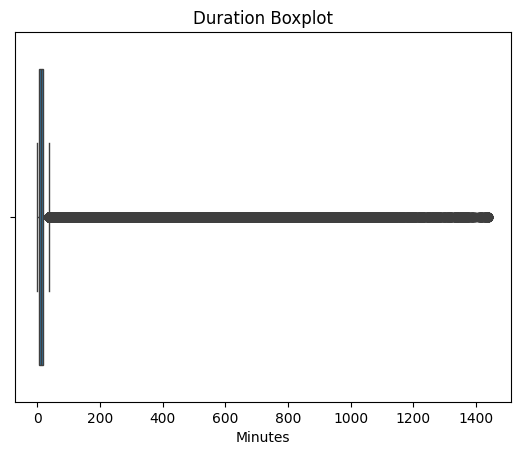

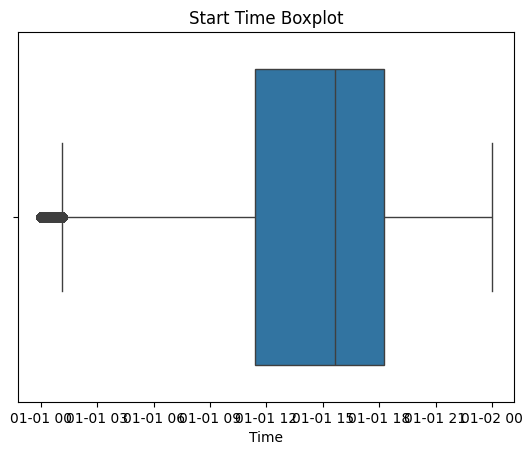

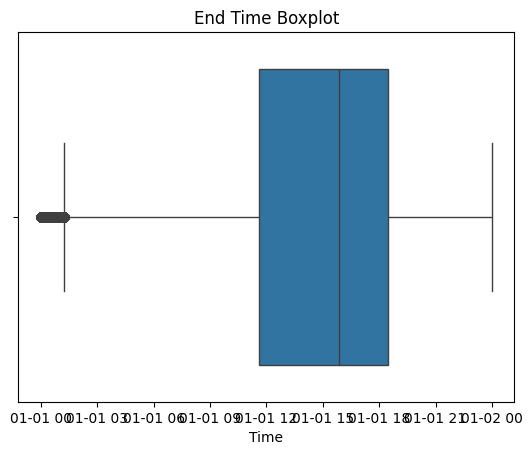

In [72]:
# Create boxplots to visualize distributions of `duration`, 'start_time', and 'end_time' and detect any outliers

# 'duration' has extreme outliers

g = sns.boxplot(x=df1['duration']);
g.set_title('Duration Boxplot');
g.set_xlabel('Minutes');
plt.show()

g = sns.boxplot(x=df1['start_time']);
g.set_title('Start Time Boxplot');
g.set_xlabel('Time');
plt.show()

g = sns.boxplot(x=df1['end_time']);
g.set_title('End Time Boxplot');
g.set_xlabel('Time');
plt.show()

In [74]:
# Determine the number of rows containing outliers for 'duration'

percentile25 = df1['duration'].quantile(0.25)
percentile75 = df1['duration'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('\033[1mDuration Upper Limit:\033[0m',upper_limit)
print('\033[1mDuration Lower Limit:\033[0m',lower_limit)

duration_outliers = df1[df1['duration'] > upper_limit]

display(df1[df1['duration'] < lower_limit])
display(df1[df1['duration'] > upper_limit])

print('\033[1m# Outliers Below Lower Limit:\033[0m',df1[df1['duration'] < lower_limit].shape[0])
print('\n')
print('\033[1m# Outliers Above Upper Limit:\033[0m',df1[df1['duration'] > upper_limit].shape[0])
print('\n')
print('\033[1m% of Data that are Outliers:\033[0m',round((len(duration_outliers)/(len(df1)))*100,3),'%')

Duration Upper Limit: 36.53333333333333
Duration Lower Limit: -12.933333333333334


,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,start_station_name,time_of_day,duration,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend,started_at,ended_at


,ride_id,rideable_type,start_date,weekday,end_date,weekend,start_time,end_time,start_station_name,time_of_day,duration,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,weeekend,started_at,ended_at
63,BB9E1783E82C5CEF,electric_bike,2023-04-21,Friday,2023-04-21,0,1900-01-01 20:38:07,1900-01-01 21:49:52,nan,night,71.750000,nan,nan,nan,nan nan,nan nan,41.890000,-87.620000,41.890000,-87.630000,member,41.89 -87.62,41.89 -87.63,41.890000,-87.630000,41.890000,-87.620000,0,2023-04-21 20:38:07,2023-04-21 21:49:52
77,F35E4C1A63EC02AF,electric_bike,2023-04-10,Monday,2023-04-10,0,1900-01-01 17:51:19,1900-01-01 18:37:34,nan,evening,46.250000,nan,nan,nan,nan nan,nan nan,41.840000,-87.610000,41.860000,-87.620000,member,41.84 -87.61,41.86 -87.62,41.860000,-87.620000,41.840000,-87.610000,0,2023-04-10 17:51:19,2023-04-10 18:37:34
100,C61FA66E5CD5D1B6,electric_bike,2023-04-15,Saturday,2023-04-15,1,1900-01-01 04:14:25,1900-01-01 05:32:49,nan,early morning,78.400000,nan,nan,nan,nan nan,nan nan,41.980000,-87.650000,41.870000,-87.620000,member,41.98 -87.65,41.87 -87.62,41.870000,-87.620000,41.980000,-87.650000,1,2023-04-15 04:14:25,2023-04-15 05:32:49
112,553DE80038D818AD,electric_bike,2023-04-21,Friday,2023-04-21,0,1900-01-01 10:27:15,1900-01-01 11:05:59,nan,late morning,38.733333,nan,nan,nan,nan nan,nan nan,41.890000,-87.630000,41.920000,-87.690000,casual,41.89 -87.63,41.92 -87.69,41.920000,-87.690000,41.890000,-87.630000,0,2023-04-21 10:27:15,2023-04-21 11:05:59
325,01ECF36348FD97E4,electric_bike,2023-04-27,Thursday,2023-04-27,0,1900-01-01 15:42:51,1900-01-01 16:20:41,Hyde Park Blvd & 55th St,afternoon,37.833333,768,nan,nan,Hyde Park Blvd & 55th St nan,768 nan,41.790000,-87.590000,41.880000,-87.630000,member,41.79 -87.59,41.88 -87.63,41.880000,-87.630000,41.790000,-87.590000,0,2023-04-27 15:42:51,2023-04-27 16:20:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751019,AF036A8A8EBF731E,docked_bike,2023-06-10,Saturday,2023-06-15,1,1900-01-01 11:56:08,1900-01-01 04:57:09,Clark St & Lincoln Ave,late morning,1021.016667,13179,nan,nan,Clark St & Lincoln Ave nan,13179 nan,41.915689,-87.634600,NaN,NaN,casual,41.915689 -87.6346,nan nan,NaN,NaN,41.915689,-87.634600,1,2023-06-10 11:56:08,2023-06-15 04:57:09
1751025,50D571C70A6F0C04,electric_bike,2023-06-24,Saturday,2023-06-24,1,1900-01-01 21:16:24,1900-01-01 22:41:04,Clinton St & Washington Blvd,night,84.666667,WL-012,nan,nan,Clinton St & Washington Blvd nan,WL-012 nan,41.883562,-87.641328,41.890000,-87.630000,casual,41.88356183333333 -87.64132833333333,41.89 -87.63,41.890000,-87.630000,41.883562,-87.641328,1,2023-06-24 21:16:24,2023-06-24 22:41:04
1751027,D3694ABFD7ECDECB,electric_bike,2023-06-24,Saturday,2023-06-25,1,1900-01-01 23:38:24,1900-01-01 00:23:30,Michigan Ave & 14th St,night,45.100000,TA1307000124,nan,nan,Michigan Ave & 14th St nan,TA1307000124 nan,41.864071,-87.623804,41.910000,-87.640000,casual,41.864070654 -87.623803735,41.91 -87.64,41.910000,-87.640000,41.864071,-87.623804,1,2023-06-24 23:38:24,2023-06-25 00:23:30
1751030,D7BBF4BCBB72DA32,classic_bike,2023-06-30,Friday,2023-06-30,0,1900-01-01 12:58:56,1900-01-01 13:41:25,Fairbanks Ct & Grand Ave,afternoon,42.483333,TA1305000003,California Ave & Milwaukee Ave,13084,Fairbanks Ct & Grand Ave California Ave & Milw...,TA1305000003 13084,41.891847,-87.620580,41.922695,-87.697153,casual,41.89184737210993 -87.62058019638062,41.922695 -87.697153,41.922695,-87.697153,41.891847,-87.620580,0,2023-06-30 12:58:56,2023-06-30 13:41:25


# Outliers Below Lower Limit: 0


# Outliers Above Upper Limit: 127871


% of Data that are Outliers: 7.303 %


In [81]:
# Get summary statistics for Members and Casual Riders

df1_mem = df1[df1['member_casual'] == 'member']
df1_cas = df1[df1['member_casual'] == 'casual']

print('\033[1mMember Summary Statistics:\033[0m')
display(df1_mem.describe(include='all'))
print('\n')

print('\033[1mCasual Rider Summary Statistics:\033[0m')
display(df1_cas.describe(include='all'))

Member Summary Statistics:


,ride_id,rideable_type,start_date,end_date,weekday,weekend,start_time,end_time,time_of_day,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
count,1068339,1068339,1068339,1068339,1068339,1.068339e+06,1068339,1068339,1068339,1.068339e+06,1068339,1068339,1068339,1068339,1068339,1068339,1.068339e+06,1.068339e+06,1.068076e+06,1.068076e+06,1068339,1068339,1068339,1.068076e+06,1.068076e+06,1.068339e+06,1.068339e+06
unique,1068339,2,NaN,NaN,7,NaN,NaN,NaN,6,NaN,1383,1280,1395,1287,111559,111108,NaN,NaN,NaN,NaN,1,402441,8213,NaN,NaN,NaN,NaN
top,8FE8F7D9C10E88C7,electric_bike,NaN,NaN,Thursday,NaN,NaN,NaN,evening,NaN,nan,nan,nan,nan,nan nan,nan nan,NaN,NaN,NaN,NaN,member,41.89 -87.65,41.88917683258 -87.6385057718,NaN,NaN,NaN,NaN
freq,1,573251,NaN,NaN,178278,NaN,NaN,NaN,371627,NaN,104033,104033,108177,108177,33514,33514,NaN,NaN,NaN,NaN,1068339,4814,7516,NaN,NaN,NaN,NaN
mean,NaN,NaN,2023-05-20 04:39:46.608745472,2023-05-20 04:44:05.645622784,NaN,2.417454e-01,1900-01-01 14:32:04.737839616,1900-01-01 14:40:30.745172224,NaN,1.241646e+01,NaN,NaN,NaN,NaN,NaN,NaN,4.190317e+01,-8.764768e+01,4.190341e+01,-8.764773e+01,NaN,NaN,NaN,4.190341e+01,-8.764773e+01,4.190317e+01,-8.764768e+01
min,NaN,NaN,2023-04-01 00:00:00,2023-04-01 00:00:00,NaN,0.000000e+00,1900-01-01 00:00:00,1900-01-01 00:00:00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.164850e+01,-8.787000e+01,0.000000e+00,-8.787000e+01,NaN,NaN,NaN,0.000000e+00,-8.787000e+01,4.164850e+01,-8.787000e+01
25%,NaN,NaN,2023-04-28 00:00:00,2023-04-28 00:00:00,NaN,0.000000e+00,1900-01-01 10:44:58,1900-01-01 10:53:04,NaN,5.050000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.188103e+01,-8.766028e+01,4.188103e+01,-8.766098e+01,NaN,NaN,NaN,4.188103e+01,-8.766098e+01,4.188103e+01,-8.766028e+01
50%,NaN,NaN,2023-05-23 00:00:00,2023-05-23 00:00:00,NaN,0.000000e+00,1900-01-01 15:30:05,1900-01-01 15:40:10,NaN,8.816667e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.189993e+01,-8.764514e+01,4.190000e+01,-8.764537e+01,NaN,NaN,NaN,4.190000e+01,-8.764537e+01,4.189993e+01,-8.764514e+01
75%,NaN,NaN,2023-06-10 00:00:00,2023-06-10 00:00:00,NaN,0.000000e+00,1900-01-01 18:10:25,1900-01-01 18:21:58,NaN,1.520000e+01,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+01,-8.763088e+01,4.193125e+01,-8.763088e+01,NaN,NaN,NaN,4.193125e+01,-8.763088e+01,4.193000e+01,-8.763088e+01
max,NaN,NaN,2023-06-30 00:00:00,2023-07-01 00:00:00,NaN,1.000000e+00,1900-01-01 23:59:59,1900-01-01 23:59:59,NaN,1.439983e+03,NaN,NaN,NaN,NaN,NaN,NaN,4.207000e+01,-8.752000e+01,4.209000e+01,0.000000e+00,NaN,NaN,NaN,4.209000e+01,0.000000e+00,4.207000e+01,-8.752000e+01




Casual Rider Summary Statistics:


,ride_id,rideable_type,start_date,end_date,weekday,weekend,start_time,end_time,time_of_day,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
count,682696,682696,682696,682696,682696,682696.000000,682696,682696,682696,682696.000000,682696,682696,682696,682696,682696,682696,682696.000000,682696.000000,680935.000000,680935.000000,682696,682696,682696,680925.000000,680925.000000,682696.000000,682696.000000
unique,682696,3,NaN,NaN,7,NaN,NaN,NaN,6,NaN,1510,1381,1503,1367,94315,93762,NaN,NaN,NaN,NaN,1,274257,7855,NaN,NaN,NaN,NaN
top,1B014DD69D09711F,electric_bike,NaN,NaN,Saturday,NaN,NaN,NaN,evening,NaN,nan,nan,nan,nan,nan nan,nan nan,NaN,NaN,NaN,NaN,casual,41.892278 -87.612043,41.892278 -87.612043,NaN,NaN,NaN,NaN
freq,1,387652,NaN,NaN,142828,NaN,NaN,NaN,236619,NaN,69097,69097,84729,84729,30384,30384,NaN,NaN,NaN,NaN,682696,11106,17406,NaN,NaN,NaN,NaN
mean,NaN,NaN,2023-05-23 08:25:31.677935104,2023-05-23 08:43:03.620234752,NaN,0.359372,1900-01-01 15:03:56.930430208,1900-01-01 15:15:08.678563328,NaN,22.237906,NaN,NaN,NaN,NaN,NaN,NaN,41.904890,-87.646502,41.905368,-87.646616,NaN,NaN,NaN,41.905368,-87.646616,41.904890,-87.646502
min,NaN,NaN,2023-04-01 00:00:00,2023-04-01 00:00:00,NaN,0.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,41.640000,-87.870000,0.000000,-88.160000,NaN,NaN,NaN,0.000000,-88.160000,41.640000,-87.870000
25%,NaN,NaN,2023-05-05 00:00:00,2023-05-05 00:00:00,NaN,0.000000,1900-01-01 12:12:11,1900-01-01 12:28:48,NaN,6.916667,NaN,NaN,NaN,NaN,NaN,NaN,41.882344,-87.660000,41.883073,-87.660141,NaN,NaN,NaN,41.883073,-87.660141,41.882344,-87.660000
50%,NaN,NaN,2023-05-28 00:00:00,2023-05-28 00:00:00,NaN,0.000000,1900-01-01 15:49:54,1900-01-01 16:07:15,NaN,12.516667,NaN,NaN,NaN,NaN,NaN,NaN,41.901007,-87.641088,41.902924,-87.641170,NaN,NaN,NaN,41.902924,-87.641170,41.901007,-87.641088
75%,NaN,NaN,2023-06-14 00:00:00,2023-06-14 00:00:00,NaN,1.000000,1900-01-01 18:26:50,1900-01-01 18:42:20,NaN,23.500000,NaN,NaN,NaN,NaN,NaN,NaN,41.931320,-87.626761,41.931931,-87.626761,NaN,NaN,NaN,41.931931,-87.626761,41.931320,-87.626761
max,NaN,NaN,2023-06-30 00:00:00,2023-07-10 00:00:00,NaN,1.000000,1900-01-01 23:59:59,1900-01-01 23:59:59,NaN,1439.983333,NaN,NaN,NaN,NaN,NaN,NaN,42.070000,-87.528232,42.110000,0.000000,NaN,NaN,NaN,42.110000,0.000000,42.070000,-87.528232


In [12]:
# Encode non-numeric variables to plot correlation matrix/heatmap

df1_encoded = df1.copy()

df1_encoded['start_station_name'] = df1_encoded['start_station_name'].astype('category').cat.codes
df1_encoded['start_station_id'] = df1_encoded['start_station_id'].astype('category').cat.codes
df1_encoded['end_station_name'] = df1_encoded['end_station_name'].astype('category').cat.codes
df1_encoded['end_station_id'] = df1_encoded['end_station_id'].astype('category').cat.codes
df1_encoded['start_end_id'] = df1_encoded['start_end_id'].astype('category').cat.codes
df1_encoded['start_end_name'] = df1_encoded['start_end_name'].astype('category').cat.codes


df1_encoded = df1_encoded.drop(columns=['ride_id','start_lat_lng','end_lat_lng'])
df1_encoded = pd.get_dummies(df1_encoded,drop_first=False,columns=['rideable_type','member_casual','weekday'])

df1_encoded.head()

,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_casual,member_casual_member,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
0,2023-04-02,2023-04-02,1900-01-01 08:37:28,1900-01-01 08:41:37,4.0,1560,1412,1565,1408,139179,138148,41.80,-87.60,41.79,-87.60,41.79,-87.60,41.80,-87.60,False,False,True,False,True,False,False,False,False,False,False,True
1,2023-04-19,2023-04-19,1900-01-01 11:29:02,1900-01-01 11:52:12,23.0,1560,1412,1565,1408,139179,138148,41.87,-87.65,41.93,-87.68,41.93,-87.68,41.87,-87.65,False,False,True,False,True,False,False,True,False,False,False,False
2,2023-04-19,2023-04-19,1900-01-01 08:41:22,1900-01-01 08:43:22,2.0,1560,1412,1565,1408,139179,138148,41.93,-87.66,41.93,-87.66,41.93,-87.66,41.93,-87.66,False,False,True,False,True,False,False,True,False,False,False,False
3,2023-04-19,2023-04-19,1900-01-01 13:31:30,1900-01-01 13:35:09,3.0,1457,534,1565,1408,123236,53476,41.92,-87.65,41.91,-87.65,41.91,-87.65,41.92,-87.65,False,False,True,False,True,False,False,True,False,False,False,False
4,2023-04-19,2023-04-19,1900-01-01 12:05:36,1900-01-01 12:10:26,4.0,1560,1412,1565,1408,139179,138148,41.91,-87.65,41.91,-87.63,41.91,-87.63,41.91,-87.65,False,False,True,False,True,False,False,True,False,False,False,False


In [94]:
# Plot correlation matrix for the dataset

display(df1_encoded.corr())

,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_casual,member_casual_member,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
start_date,1.000000,0.999987,0.003051,0.002467,0.050501,-0.008022,-0.012706,-0.009720,-0.013840,0.007380,0.005406,0.037175,-0.005569,0.023879,-0.000111,0.023880,-0.000111,0.037175,-0.005569,0.024414,0.000273,-0.024370,0.060607,-0.060607,0.011989,-0.028127,0.000679,-0.015905,0.031301,0.000940,-0.001657
end_date,0.999987,1.000000,0.003345,0.001941,0.050842,-0.008004,-0.012697,-0.009813,-0.013963,0.007367,0.005378,0.037128,-0.005537,0.023879,-0.000117,0.023880,-0.000116,0.037128,-0.005537,0.024391,0.000772,-0.024490,0.060781,-0.060781,0.011956,-0.028164,0.000651,-0.015925,0.031335,0.001018,-0.001659
start_time,0.003051,0.003345,1.000000,0.952756,0.043781,0.005815,-0.011407,0.000105,-0.008718,0.024117,0.012090,0.019501,0.007309,0.039244,-0.013543,0.039245,-0.013543,0.019501,0.007309,0.000656,0.008035,-0.002974,0.052843,-0.052843,0.000245,-0.001896,0.008550,0.022961,0.025176,-0.003028,-0.057282
end_time,0.002467,0.001941,0.952756,1.000000,0.070047,0.005298,-0.011778,0.000793,-0.008837,0.021498,0.008673,0.018514,0.012533,0.037815,-0.011130,0.037816,-0.011130,0.018514,0.012533,0.007081,0.012326,-0.010606,0.056652,-0.056652,0.002642,-0.000452,0.008075,0.021906,0.020206,-0.005312,-0.051388
duration,0.050501,0.050842,0.043781,0.070047,1.000000,0.005519,-0.018376,0.006294,-0.023577,-0.032190,-0.069260,0.007372,0.063627,0.016910,0.015525,0.016910,0.015526,0.007372,0.063627,0.102440,0.152758,-0.146042,0.190405,-0.190405,-0.019887,-0.040029,-0.041100,-0.030734,-0.004898,0.077693,0.056933
start_station_name,-0.008022,-0.008004,0.005815,0.005298,0.005519,1.000000,0.314017,0.107989,0.071447,0.593363,-0.049344,-0.024029,0.021291,-0.015551,0.005684,-0.015551,0.005684,-0.024029,0.021291,0.100812,0.013442,-0.104184,0.005533,-0.005533,0.000194,-0.002287,-0.004068,0.000264,0.001304,0.000895,0.003797
start_station_id,-0.012706,-0.012697,-0.011407,-0.011778,-0.018376,0.314017,1.000000,0.070849,0.165434,-0.094049,0.533737,-0.032499,0.115166,-0.027631,0.028962,-0.027632,0.028962,-0.032499,0.115166,0.191086,0.001706,-0.190611,-0.036537,0.036537,0.005080,0.007527,0.006857,0.006797,-0.001774,-0.016583,-0.007006
end_station_name,-0.009720,-0.009813,0.000105,0.000793,0.006294,0.107989,0.070849,1.000000,0.320597,0.011875,-0.027884,-0.015592,0.018488,-0.013426,0.005799,-0.013424,0.005798,-0.015592,0.018488,0.107226,0.017781,-0.111819,-0.002826,0.002826,0.000863,-0.003363,-0.003982,-0.001266,0.000888,0.002048,0.005007
end_station_id,-0.013840,-0.013963,-0.008718,-0.008837,-0.023577,0.071447,0.165434,0.320597,1.000000,-0.059418,0.020511,-0.028780,0.093733,-0.016060,0.030882,-0.016059,0.030881,-0.028780,0.093733,0.201874,-0.001157,-0.200517,-0.056070,0.056070,0.007083,0.008752,0.008439,0.006625,-0.003963,-0.018811,-0.006822
start_end_name,0.007380,0.007367,0.024117,0.021498,-0.032190,0.593363,-0.094049,0.011875,-0.059418,1.000000,0.356676,0.009028,0.031244,0.005496,0.002802,0.005496,0.002802,0.009028,0.031244,-0.156854,-0.026759,0.163788,0.012301,-0.012301,-0.003165,-0.008398,-0.007725,-0.001641,0.006015,0.010416,0.003512


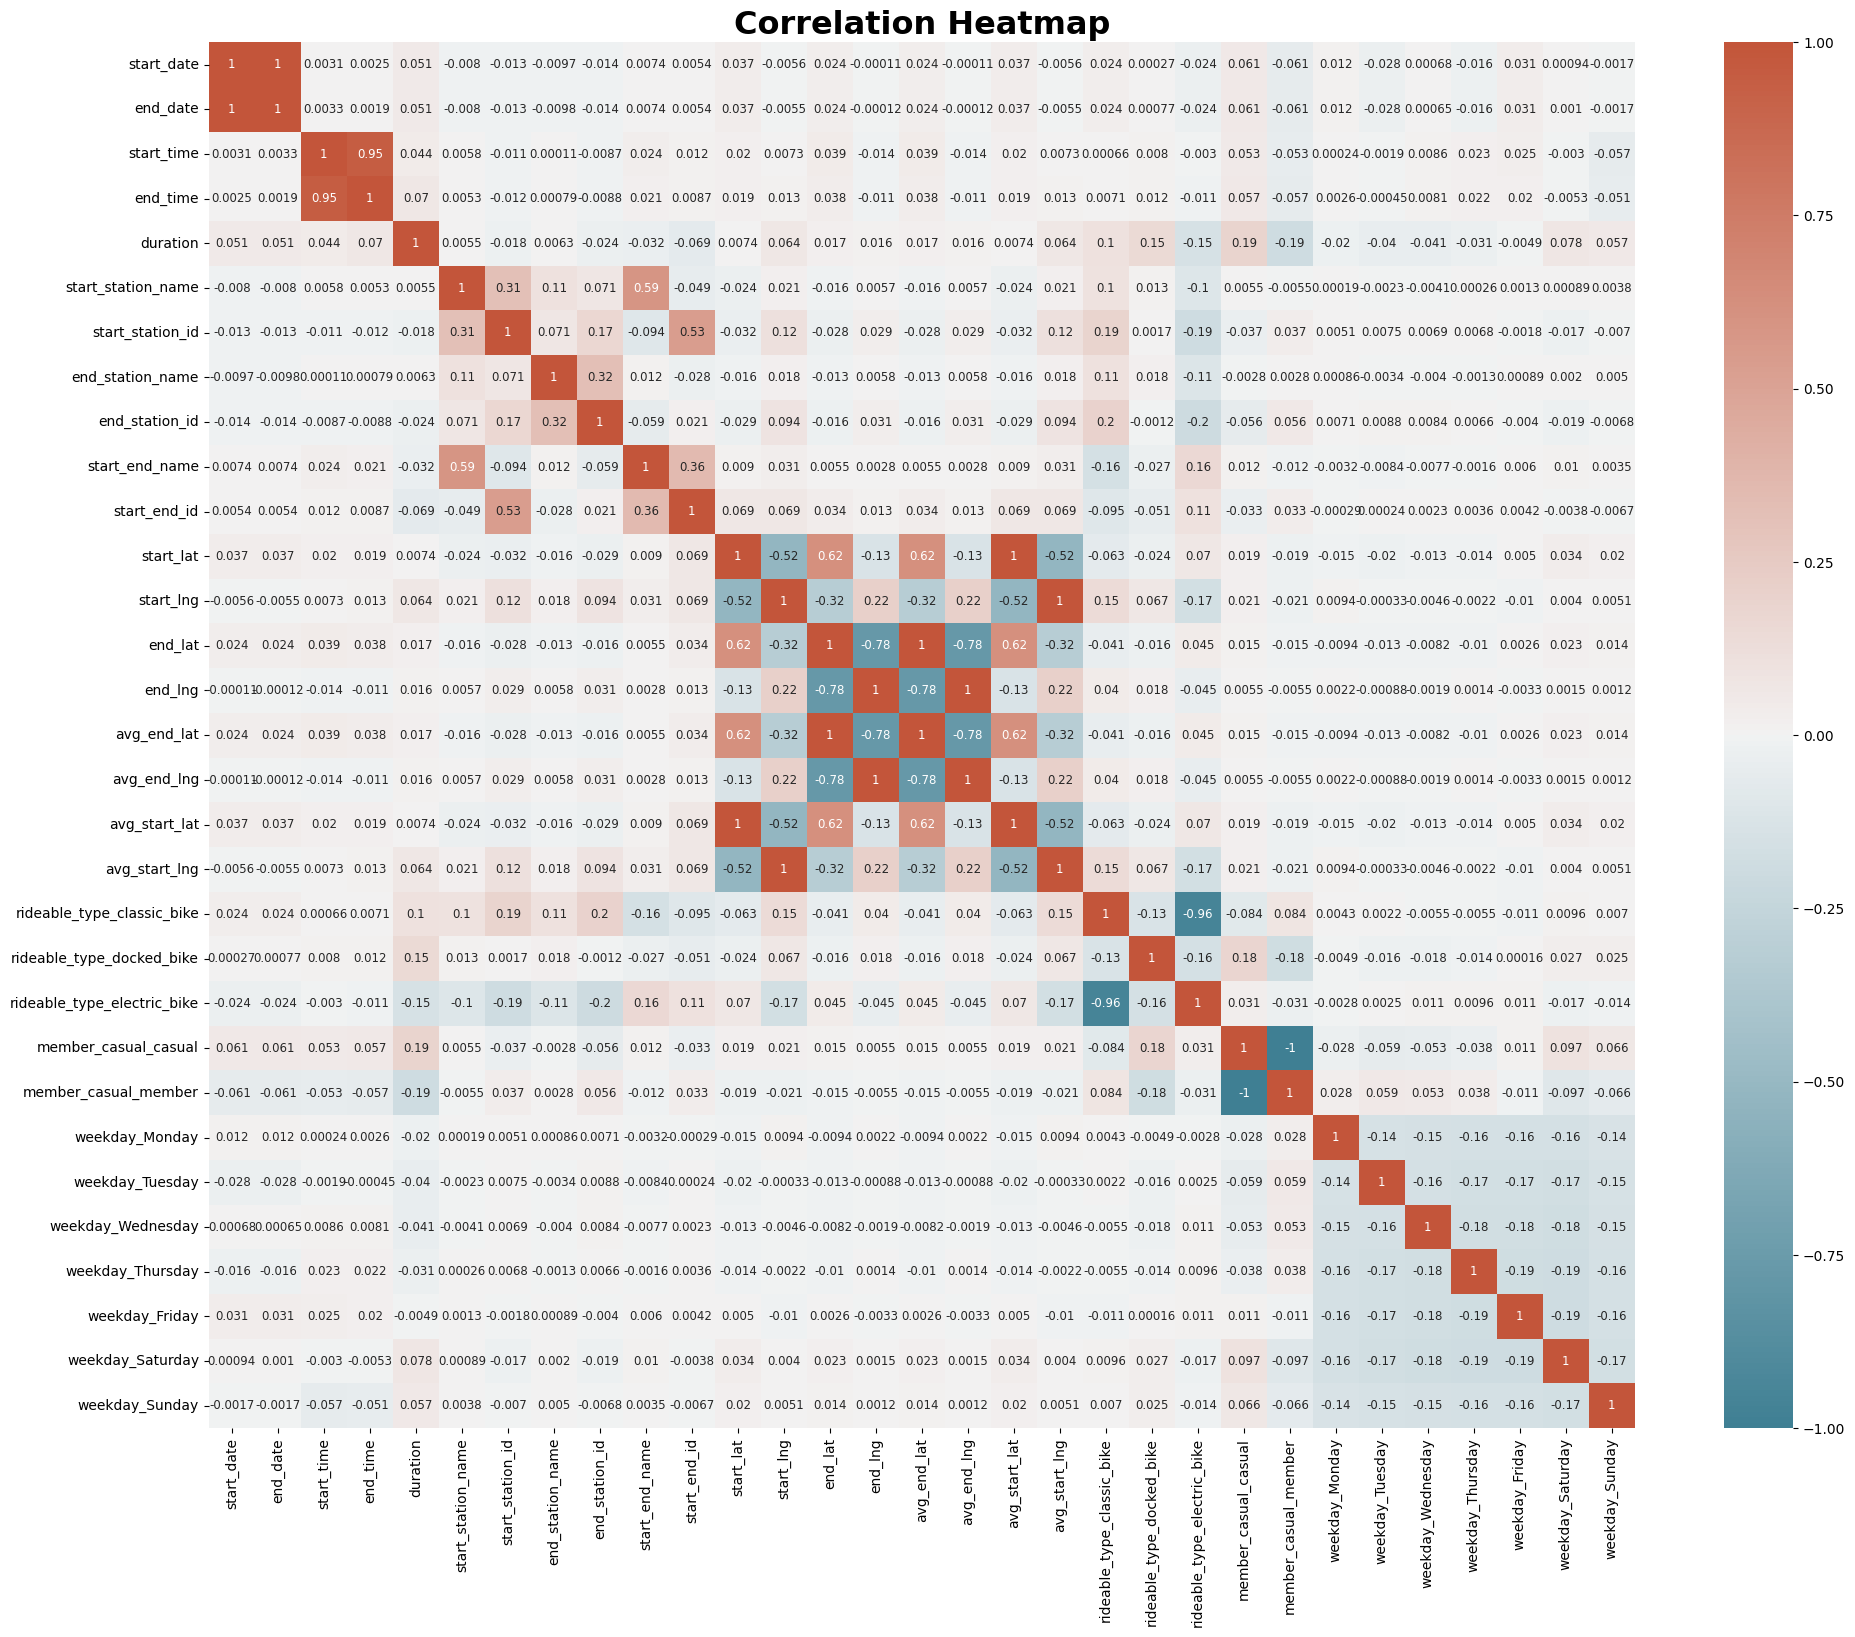

In [95]:
# Plot correlation heatmap for the dataset

plt.figure(figsize=(23,18))
ax = sns.heatmap(df1_encoded.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 8.5}, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap', fontsize=23, fontweight='bold')
plt.show()

In [50]:
# Trips breakdown by QTR of interest (3rd QTR: APR-JUN23), entire year (4th QTR FY22 - 3rd QTR FY23), and other quarters in the year from 4QFY22 - 3QFY23

print('Total Trips in 3rd QTR (APR-JUN23):',len(df1))
print('3rd QTR Trips %:',round(((len(df1)) / (len(df2)))*100,2),'%')
print('Total Trips in 2nd QTR (JAN-MAR23):',len(jan_23_df) + len(feb_23_df) + len(mar_23_df))
print('2nd QTR Trips %:',round(((len(jan_23_df) + len(feb_23_df) + len(mar_23_df)) / (len(df2)))*100,2),'%')
print('Total Trips in 1st QTR (OCT-DEC22):',len(oct_22_df) + len(nov_22_df) + len(dec_22_df))
print('1st QTR Trips %:',round(((len(oct_22_df) + len(nov_22_df) + len(dec_22_df)) / (len(df2)))*100,2),'%')
print('Total Trips in 4th QTR (JUL-SEP22):',len(jul_22_df) + len(aug_22_df) + len(sep_22_df))
print('4th QTR Trips %:',round(((len(jul_22_df) + len(aug_22_df) + len(sep_22_df)) / (len(df2)))*100,2),'%')

print('\n')
print('Total Trips in 4QFY22 - 3QFY23 (JUL22 - JUN23):',len(df2))
print('4QFY22 - 3QFY23 # Member Trips:',len(df2[df2['member_casual'] == 'member']))
print('4QFY22 - 3QFY23 Member Trips %:',round((len(df2[df2['member_casual'] == 'member']) / len(df2))*100,2),'%')
print('4QFY22 - 3QFY23 # Casual Trips:',len(df2[df2['member_casual'] == 'casual']))
print('4QFY22 - 3QFY23 Casual Trips %:',round((len(df2[df2['member_casual'] == 'casual']) / len(df2))*100,2),'%')

print('\n')

print('3rd QTR # Member Trips:',len(df1[df1['member_casual'] == 'member']))
print('3rd QTR Member Trips %:',round((len(df1[df1['member_casual'] == 'member']) / len(df1))*100,2),'%')
print('3rd QTR # Casual Trips:',len(df1[df1['member_casual'] == 'casual']))
print('3rd QTR Casual Trips %:',round((len(df1[df1['member_casual'] == 'casual']) / len(df1))*100,2),'%')
print('\n')

print('JUL22 # Trips:',len(jul_22_df))
print('JUL22 # Member Trips:',len(jul_22_df[jul_22_df['member_casual'] == 'member']))
print('JUL22 # Casual Trips:',len(jul_22_df[jul_22_df['member_casual'] == 'casual']))
print('JUL22 Member Trips %:',round(((len(jul_22_df[jul_22_df['member_casual'] == 'member'])) / (len(jul_22_df)))*100,2),'%')
print('JUL22 Casual Trips %:',round(((len(jul_22_df[jul_22_df['member_casual'] == 'casual'])) / (len(jul_22_df)))*100,2),'%')
print('\n')

print('AUG22 # Trips:',len(aug_22_df))
print('AUG22 # Member Trips:',len(aug_22_df[aug_22_df['member_casual'] == 'member']))
print('AUG22 # Casual Trips:',len(aug_22_df[aug_22_df['member_casual'] == 'casual']))
print('AUG22 Member Trips %:',round(((len(aug_22_df[aug_22_df['member_casual'] == 'member'])) / (len(aug_22_df)))*100,2),'%')
print('AUG22 Casual Trips %:',round(((len(aug_22_df[aug_22_df['member_casual'] == 'casual'])) / (len(aug_22_df)))*100,2),'%')
print('\n')

print('SEP22 # Trips:',len(sep_22_df))
print('SEP22 # Member Trips:',len(sep_22_df[sep_22_df['member_casual'] == 'member']))
print('SEP22 # Casual Trips:',len(sep_22_df[sep_22_df['member_casual'] == 'casual']))
print('SEP22 Member Trips %:',round(((len(sep_22_df[sep_22_df['member_casual'] == 'member'])) / (len(sep_22_df)))*100,2),'%')
print('SEP22 Casual Trips %:',round(((len(sep_22_df[sep_22_df['member_casual'] == 'casual'])) / (len(sep_22_df)))*100,2),'%')
print('\n')

print('OCT22 # Trips:',len(oct_22_df))
print('OCT22 # Member Trips:',len(oct_22_df[oct_22_df['member_casual'] == 'member']))
print('OCT22 # Casual Trips:',len(oct_22_df[oct_22_df['member_casual'] == 'casual']))
print('OCT22 Member Trips %:',round(((len(oct_22_df[oct_22_df['member_casual'] == 'member'])) / (len(oct_22_df)))*100,2),'%')
print('OCT22 Casual Trips %:',round(((len(oct_22_df[oct_22_df['member_casual'] == 'casual'])) / (len(oct_22_df)))*100,2),'%')
print('\n')

print('NOV22 # Trips:',len(nov_22_df))
print('NOV22 # Member Trips:',len(nov_22_df[nov_22_df['member_casual'] == 'member']))
print('NOV22 # Casual Trips:',len(nov_22_df[nov_22_df['member_casual'] == 'casual']))
print('NOV22 Member Trips %:',round(((len(nov_22_df[nov_22_df['member_casual'] == 'member'])) / (len(nov_22_df)))*100,2),'%')
print('NOV22 Casual Trips %:',round(((len(nov_22_df[nov_22_df['member_casual'] == 'casual'])) / (len(nov_22_df)))*100,2),'%')
print('\n')

print('DEC22 # Trips:',len(dec_22_df))
print('DEC22 # Member Trips:',len(dec_22_df[dec_22_df['member_casual'] == 'member']))
print('DEC22 # Casual Trips:',len(dec_22_df[dec_22_df['member_casual'] == 'casual']))
print('DEC22 Member Trips %:',round(((len(dec_22_df[dec_22_df['member_casual'] == 'member'])) / (len(dec_22_df)))*100,2),'%')
print('DEC22 Casual Trips %:',round(((len(dec_22_df[dec_22_df['member_casual'] == 'casual'])) / (len(dec_22_df)))*100,2),'%')
print('\n')

print('JAN23 # Trips:',len(jan_23_df))
print('JAN23 # Member Trips:',len(jan_23_df[jan_23_df['member_casual'] == 'member']))
print('JAN23 # Casual Trips:',len(jan_23_df[jan_23_df['member_casual'] == 'casual']))
print('JAN23 Member Trips %:',round(((len(jan_23_df[jan_23_df['member_casual'] == 'member'])) / (len(jan_23_df)))*100,2),'%')
print('JAN23 Casual Trips %:',round(((len(jan_23_df[jan_23_df['member_casual'] == 'casual'])) / (len(jan_23_df)))*100,2),'%')
print('\n')

print('FEB23 # Trips:',len(feb_23_df))
print('FEB23 # Member Trips:',len(feb_23_df[feb_23_df['member_casual'] == 'member']))
print('FEB23 # Casual Trips:',len(feb_23_df[feb_23_df['member_casual'] == 'casual']))
print('FEB23 Member Trips %:',round(((len(feb_23_df[feb_23_df['member_casual'] == 'member'])) / (len(feb_23_df)))*100,2),'%')
print('FEB23 Casual Trips %:',round(((len(feb_23_df[feb_23_df['member_casual'] == 'casual'])) / (len(feb_23_df)))*100,2),'%')
print('\n')

print('MAR23 # Trips:',len(mar_23_df))
print('MAR23 # Member Trips:',len(mar_23_df[mar_23_df['member_casual'] == 'member']))
print('MAR23 # Casual Trips:',len(mar_23_df[mar_23_df['member_casual'] == 'casual']))
print('MAR23 Member Trips %:',round(((len(mar_23_df[mar_23_df['member_casual'] == 'member'])) / (len(mar_23_df)))*100,2),'%')
print('MAR23 Casual Trips %:',round(((len(mar_23_df[mar_23_df['member_casual'] == 'casual'])) / (len(mar_23_df)))*100,2),'%')
print('\n')

print('APR23 # Trips:',len(apr_23_df))
print('APR23 # Member Trips:',len(apr_23_df[apr_23_df['member_casual'] == 'member']))
print('APR23 # Casual Trips:',len(apr_23_df[apr_23_df['member_casual'] == 'casual']))
print('APR23 Member Trips %:',round(((len(apr_23_df[apr_23_df['member_casual'] == 'member'])) / (len(apr_23_df)))*100,2),'%')
print('APR23 Casual Trips %:',round(((len(apr_23_df[apr_23_df['member_casual'] == 'casual'])) / (len(apr_23_df)))*100,2),'%')
print('\n')

print('MAY23 # Trips:',len(may_23_df))
print('MAY23 # Member Trips:',len(may_23_df[may_23_df['member_casual'] == 'member']))
print('MAY23 # Casual Trips:',len(may_23_df[may_23_df['member_casual'] == 'casual']))
print('MAY23 Member Trips %:',round(((len(may_23_df[may_23_df['member_casual'] == 'member'])) / (len(may_23_df)))*100,2),'%')
print('MAY23 Casual Trips %:',round(((len(may_23_df[may_23_df['member_casual'] == 'casual'])) / (len(may_23_df)))*100,2),'%')
print('\n')

print('JUN23 # Trips:',len(jun_23_df))
print('JUN23 # Member Trips:',len(jun_23_df[jun_23_df['member_casual'] == 'member']))
print('JUN23 # Casual Trips:',len(jun_23_df[jun_23_df['member_casual'] == 'casual']))
print('JUN23 Member Trips %:',round(((len(jun_23_df[jun_23_df['member_casual'] == 'member'])) / (len(jun_23_df)))*100,2),'%')
print('JUN23 Casual Trips %:',round(((len(jun_23_df[jun_23_df['member_casual'] == 'casual'])) / (len(jun_23_df)))*100,2),'%')
print('\n')

print('JUL23 # Trips:',len(jul_23_df))
print('JUL23 # Member Trips:',len(jul_23_df[jul_23_df['member_casual'] == 'member']))
print('JUL23 # Casual Trips:',len(jul_23_df[jul_23_df['member_casual'] == 'casual']))
print('JUL23 Member Trips %:',round(((len(jul_23_df[jul_23_df['member_casual'] == 'member'])) / (len(jul_23_df)))*100,2),'%')
print('JUL23 Casual Trips %:',round(((len(jul_23_df[jul_23_df['member_casual'] == 'casual'])) / (len(jul_23_df)))*100,2),'%')

Total Trips in 3rd QTR (APR-JUN23): 1751035
3rd QTR Trips %: 30.3 %
Total Trips in 2nd QTR (JAN-MAR23): 639424
2nd QTR Trips %: 11.06 %
Total Trips in 1st QTR (OCT-DEC22): 1078226
1st QTR Trips %: 18.66 %
Total Trips in 4th QTR (JUL-SEP22): 2310759
4th QTR Trips %: 39.98 %


Total Trips in 4QFY22 - 3QFY23 (JUL22 - JUN23): 5779444
4QFY22 - 3QFY23 # Member Trips: 3535192
4QFY22 - 3QFY23 Member Trips %: 61.17 %
4QFY22 - 3QFY23 # Casual Trips: 2244252
4QFY22 - 3QFY23 Casual Trips %: 38.83 %


3rd QTR # Member Trips: 1068339
3rd QTR Member Trips %: 61.01 %
3rd QTR # Casual Trips: 682696
3rd QTR Casual Trips %: 38.99 %


JUL22 # Trips: 823488
JUL22 # Member Trips: 417433
JUL22 # Casual Trips: 406055
JUL22 Member Trips %: 50.69 %
JUL22 Casual Trips %: 49.31 %


AUG22 # Trips: 785932
AUG22 # Member Trips: 427008
AUG22 # Casual Trips: 358924
AUG22 Member Trips %: 54.33 %
AUG22 Casual Trips %: 45.67 %


SEP22 # Trips: 701339
SEP22 # Member Trips: 404642
SEP22 # Casual Trips: 296697
SEP22 Member 

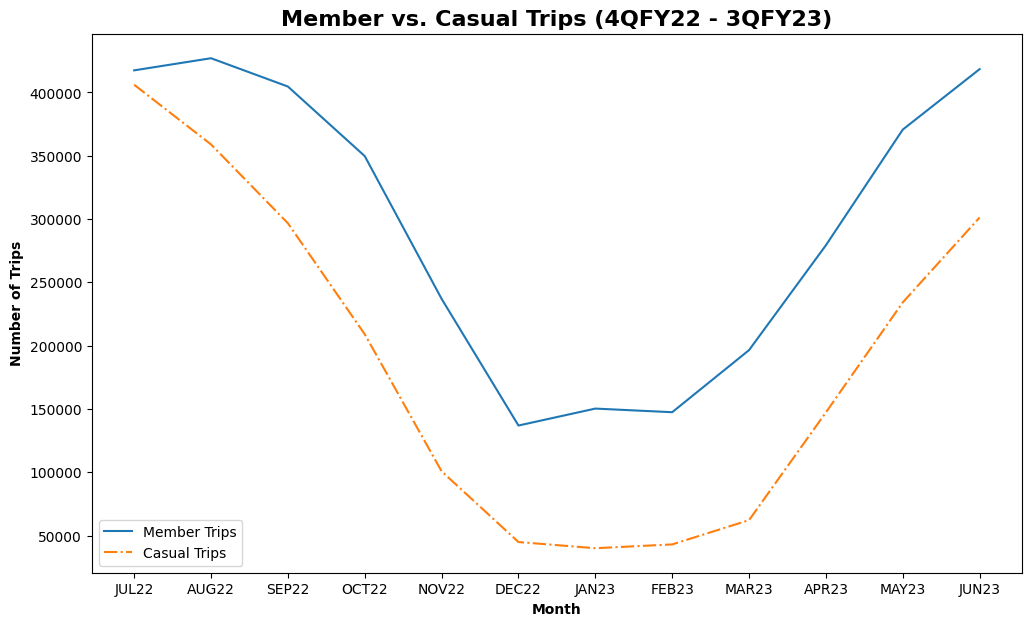

In [96]:
# Plot Member vs. Casual trips from 4QFY22 - 3QFY23

months_yr = ['JUL22','AUG22','SEP22','OCT22','NOV22','DEC22','JAN23','FEB23','MAR23','APR23','MAY23','JUN23']

member_trips_yr = ['417433','427008','404642','349696','236963','136912','150293','147429','196477','279305','370646','418388']

casual_trips_yr = ['406055','358924','296697','208989','100772','44894','40008','43016','62201','147285','234181','301230']

yr_trips_df = pd.DataFrame(columns=[months_yr,member_trips_yr,casual_trips_yr])
yr_trips_df = yr_trips_df.T.reset_index()
yr_trips_df.columns = ['month','member_trips','casual_trips']
yr_trips_df['casual_trips'] = yr_trips_df['casual_trips'].astype(int)
yr_trips_df['member_trips'] = yr_trips_df['member_trips'].astype(int)
yr_trips_df

plt.figure(figsize = (12, 7)) 
plt.plot(yr_trips_df['month'], yr_trips_df['member_trips'], label ='Member Trips')
plt.plot(yr_trips_df['month'], yr_trips_df['casual_trips'], '-.', label ='Casual Trips')

plt.xlabel("Month",fontweight='bold')
plt.ylabel("Number of Trips",fontweight='bold')
plt.legend()
plt.title('Member vs. Casual Trips (4QFY22 - 3QFY23)',fontweight='bold',fontsize=16)
plt.show()


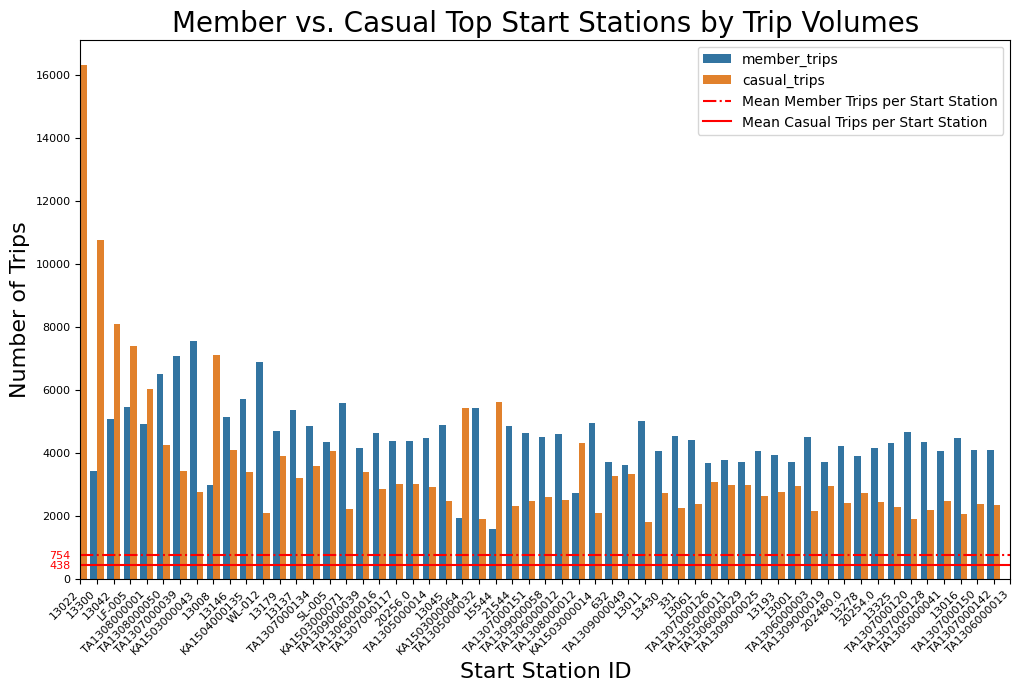

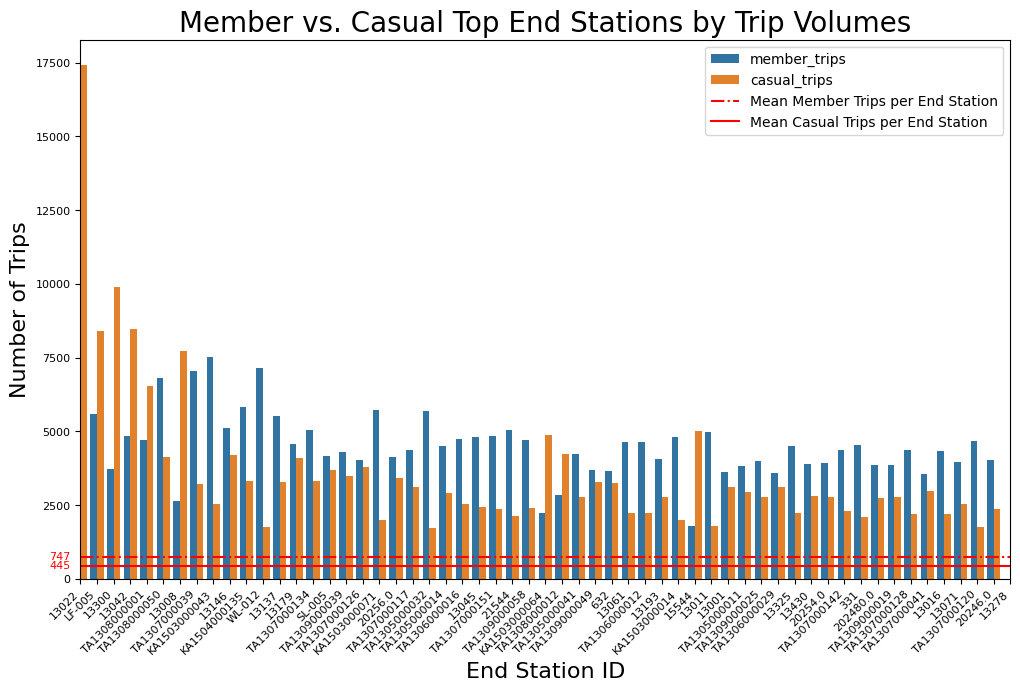

Top Start Stations Not In The Set of Top End Stations:
{'13278', 'TA1306000003', 'TA1307000150'}
3
Top End Stations Not In The Set of Top Start Stations:
{'TA1307000041', '13071', '20246.0'}
3


Start Stations with Fewest Number of Trips


,start_station_id,variable,value
1735,365.0,member_trips,1
1882,1263.0,member_trips,1
1888,20201,member_trips,0
1931,871,member_trips,0
1936,847,casual_trips,1
...,...,...,...
2819,1041,member_trips,0
2820,941,casual_trips,0
2821,941,member_trips,1
2822,737,member_trips,1


End Stations with Fewest Number of Trips


,end_station_id,variable,value
1658,1088.0,member_trips,0
1855,969,member_trips,1
1864,362.0,member_trips,0
1899,20221,member_trips,1
1913,938,member_trips,0
...,...,...,...
2811,1218.0,member_trips,1
2812,1276.0,casual_trips,0
2813,1276.0,member_trips,1
2814,1266.0,member_trips,0


Least Traffic Start Stations Not In The Set of Least Traffic End Stations:
{'20220', '1213.0', '1135.0', '998', '740', '893', '1017', '1136.0', '648', '789', '793', '957', '1232.0', '823', '542', '992', 'Hubbard Bike-checking (LBS-WH-TEST)', '1173.0', '476', '1197.0', '1040', '1188.0', '20201', '533', '1174.0', '1122.0', '1077.0', '1195.0', '715', '1179.0', '1256.0', '1097.0', '1267.0', '839', '1167.0', '679', '845', '716', '1202.0', '1090.0', '1186.0', '365.0', '917', '20126', '578', '918', '834', '972', '1029', '912', '702', '830', '1055', '1081.0', '1028', '970', '1071', '1061', '909', '1268.0', '1130.0', '1161.0', '953', '698', '588', '493', '678', '1099.0', '689', '1242.0', '509', '828', '1269.0', '20210', '1146.0', '1171.0', '1241.0', '982', '921', '720', '656'}
81
Least Traffic End Stations Not In The Set of Least Traffic Start Stations:
{'1034', '20133', '2059 Hastings Warehouse Station', '1018', '1246.0', '1150.0', '706', 'OH Charging Stx - Test', '696', '1157.0', '749', '2024

In [292]:
# Plot member and casual trips for top start and end stations

# Return lists of start and end stations with fewest number of trips

ssid_by_vol = pd.DataFrame(df1['start_station_id'].value_counts().sort_values(ascending=False).reset_index())

ssid_mem_vol = df1[df1['member_casual'] == 'member']
ssid_mem_vol = pd.DataFrame(ssid_mem_vol['start_station_id'].value_counts().sort_values(ascending=False).reset_index())

ssid_by_vol = ssid_by_vol.merge(ssid_mem_vol,how='outer',on='start_station_id')
ssid_cas_vol = df1[df1['member_casual'] == 'casual']
ssid_cas_vol = pd.DataFrame(ssid_cas_vol['start_station_id'].value_counts().sort_values(ascending=False).reset_index())

ssid_by_vol = ssid_by_vol.merge(ssid_cas_vol,how='outer',on='start_station_id')
ssid_by_vol = ssid_by_vol.rename(columns={'count_x':'total_trips','count_y':'member_trips','count':'casual_trips'})
ssid_by_vol = ssid_by_vol.sort_values(by='total_trips',ascending=False)

#display(ssid_by_vol)

ssid_order = ssid_by_vol['start_station_id']
ssid_by_vol = ssid_by_vol.drop(['total_trips'],axis=1).melt(id_vars='start_station_id')
ssid_by_vol = ssid_by_vol.fillna(value=0)
ssid_by_vol['value'] = ssid_by_vol['value'].astype(int)
ssid_by_vol['start_station_id'] = pd.Categorical(ssid_by_vol['start_station_id'],categories=ssid_order)
ssid_by_vol = ssid_by_vol.sort_values(by='start_station_id').reset_index(drop=True)

#display(ssid_by_vol)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=ssid_by_vol['start_station_id'][:112], y=ssid_by_vol['value'][:112],hue=ssid_by_vol['variable'])
ax.axhline(ssid_mem_vol['count'].mean(),color='r',linestyle='-.',label='Mean Member Trips per Start Station')
ax.axhline(ssid_cas_vol['count'].mean(),color='r',label='Mean Casual Trips per Start Station')
ax.set_title("Member vs. Casual Top Start Stations by Trip Volumes",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,112,1))
ax.set_xlim(0,56)
ax.set_xlabel("Start Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,753.9530883502737, "{:.0f}".format(753.9530883502737), color="red", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,437.7503660322108, "{:.0f}".format(437.7503660322108), color="red", transform=trans, ha="right", va="center",fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

len(df1)*0.8

esid_by_vol = pd.DataFrame(df1['end_station_id'].value_counts().sort_values(ascending=False).reset_index())

esid_mem_vol = df1[df1['member_casual'] == 'member']
esid_mem_vol = pd.DataFrame(esid_mem_vol['end_station_id'].value_counts().sort_values(ascending=False).reset_index())

esid_by_vol = esid_by_vol.merge(esid_mem_vol,how='outer',on='end_station_id')
esid_cas_vol = df1[df1['member_casual'] == 'casual']
esid_cas_vol = pd.DataFrame(esid_cas_vol['end_station_id'].value_counts().sort_values(ascending=False).reset_index())

esid_by_vol = esid_by_vol.merge(esid_cas_vol,how='outer',on='end_station_id')
esid_by_vol = esid_by_vol.rename(columns={'count_x':'total_trips','count_y':'member_trips','count':'casual_trips'})
esid_by_vol = esid_by_vol.sort_values(by='total_trips',ascending=False)

#display(esid_by_vol)

esid_order = esid_by_vol['end_station_id']
esid_by_vol = esid_by_vol.drop(['total_trips'],axis=1).melt(id_vars='end_station_id')
esid_by_vol = esid_by_vol.fillna(value=0)
esid_by_vol['value'] = esid_by_vol['value'].astype(int)
esid_by_vol['end_station_id'] = pd.Categorical(esid_by_vol['end_station_id'],categories=esid_order)
esid_by_vol = esid_by_vol.sort_values(by='end_station_id').reset_index(drop=True)

#display(esid_by_vol)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=esid_by_vol['end_station_id'][:112], y=esid_by_vol['value'][:112],hue=esid_by_vol['variable'])
ax.axhline(esid_mem_vol['count'].mean(),color='r',linestyle='-.',label='Mean Member Trips per End Station')
ax.axhline(esid_cas_vol['count'].mean(),color='r',label='Mean Casual Trips per End Station')
ax.set_title("Member vs. Casual Top End Stations by Trip Volumes",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,112,1))
ax.set_xlim(0,56)
ax.set_xlabel("End Station ID",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData) # https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib
ax.text(0,746.6267496111975, "{:.0f}".format(746.6267496111975), color="red", transform=trans, ha="right", va="center",fontsize=8)
ax.text(0,444.63695652173914, "{:.0f}".format(444.63695652173914), color="red", transform=trans, ha="right", va="center",fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

# Identify what stations are different in the sets of top start and end stations

print('\033[1mTop Start Stations Not In The Set of Top End Stations:\033[0m')
print(set(ssid_by_vol['start_station_id'][:112]).difference(set(esid_by_vol['end_station_id'][:112])))
print(len(set(ssid_by_vol['start_station_id'][:112]).difference(set(esid_by_vol['end_station_id'][:112]))))

print('\033[1mTop End Stations Not In The Set of Top Start Stations:\033[0m')
print(set(esid_by_vol['end_station_id'][:112]).difference(set(ssid_by_vol['start_station_id'][:112])))
print(len(set(esid_by_vol['end_station_id'][:112]).difference(set(ssid_by_vol['start_station_id'][:112]))))

# Start stations with fewest number of trips over the quarter (<= 1)

print('\n')
print('\033[1mStart Stations with Fewest Number of Trips\033[0m')
display(ssid_by_vol[ssid_by_vol['value'] <= 1])

# End stations with fewest number of trips over the quarter (<= 1)

print('\033[1mEnd Stations with Fewest Number of Trips\033[0m')
display(esid_by_vol[esid_by_vol['value'] <= 1])

# Identify what stations are different in the sets of start and end stations with fewest number of trips (<= 1)

print('\033[1mLeast Traffic Start Stations Not In The Set of Least Traffic End Stations:\033[0m')
print(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']).difference(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id'])))
print(len(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']).difference(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']))))
least_start_end_set = set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']).difference(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']))

print('\033[1mLeast Traffic End Stations Not In The Set of Least Traffic Start Stations:\033[0m')
print(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']).difference(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id'])))
print(len(set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']).difference(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']))))
least_end_start_set = set(esid_by_vol[esid_by_vol['value'] <= 1]['end_station_id']).difference(set(ssid_by_vol[ssid_by_vol['value'] <= 1]['start_station_id']))

In [293]:
# Examine station 13022. It has by far the most traffic compared to other stations and casual riders use it 3+ times more than members

# Streeter Dr & Grand Ave (13022) in Chicago is on the Navy Pier (top tourist destination) next to Jane Addams Memorial Park

display(ssid_by_vol[ssid_by_vol['start_station_id'] == '13022'])
display(esid_by_vol[esid_by_vol['end_station_id'] == '13022'])
display(df1[df1['start_station_id'] == '13022'].head())

,start_station_id,variable,value
0,13022,member_trips,5839
1,13022,casual_trips,16292


,end_station_id,variable,value
0,13022,member_trips,5150
1,13022,casual_trips,17407


,ride_id,rideable_type,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
18889,6F59F3C0D19B2751,electric_bike,2023-04-15,2023-04-15,1900-01-01 18:57:40,1900-01-01 19:06:38,0 days 00:08:58,Streeter Dr & Grand Ave,13022,Dearborn Pkwy & Delaware Pl,TA1307000128,41.892187,-87.612262,41.898969,-87.629912,member,41.892187 -87.61226183333333,41.898969 -87.629912,41.898969,-87.629912,41.892187,-87.612262
19081,34377C5587B33CA6,classic_bike,2023-04-13,2023-04-13,1900-01-01 19:30:48,1900-01-01 19:42:14,0 days 00:11:26,Streeter Dr & Grand Ave,13022,Clark St & Schiller St,TA1309000024,41.892278,-87.612043,41.907993,-87.631501,casual,41.892278 -87.612043,41.907993 -87.631501,41.907993,-87.631501,41.892278,-87.612043
19395,2E969C4BA5EA0473,docked_bike,2023-04-21,2023-04-21,1900-01-01 13:40:13,1900-01-01 14:01:44,0 days 00:21:31,Streeter Dr & Grand Ave,13022,Clark St & Schiller St,TA1309000024,41.892278,-87.612043,41.907993,-87.631501,casual,41.892278 -87.612043,41.907993 -87.631501,41.907993,-87.631501,41.892278,-87.612043
19553,E753115754D0A858,docked_bike,2023-04-15,2023-04-15,1900-01-01 14:04:44,1900-01-01 14:18:36,0 days 00:13:52,Streeter Dr & Grand Ave,13022,Dearborn Pkwy & Delaware Pl,TA1307000128,41.892278,-87.612043,41.898969,-87.629912,casual,41.892278 -87.612043,41.898969 -87.629912,41.898969,-87.629912,41.892278,-87.612043
19571,A3C75AD3678206E0,classic_bike,2023-04-08,2023-04-08,1900-01-01 18:57:22,1900-01-01 20:02:59,0 days 01:05:37,Streeter Dr & Grand Ave,13022,California Ave & Francis Pl (Temp),13259,41.892278,-87.612043,41.918491,-87.697423,casual,41.892278 -87.612043,41.91849115368695 -87.69742280244827,41.918491,-87.697423,41.892278,-87.612043


,start_end_name,total_trips,member_trips,casual_trips
0,Streeter Dr & Grand Ave Streeter Dr & Grand Ave,3588,516.0,3072.0
1,DuSable Lake Shore Dr & Monroe St DuSable Lake...,2785,306.0,2479.0
2,Ellis Ave & 60th St University Ave & 57th St,1985,1547.0,438.0
3,Michigan Ave & Oak St Michigan Ave & Oak St,1895,381.0,1514.0
4,University Ave & 57th St Ellis Ave & 60th St,1814,1368.0,446.0
...,...,...,...,...
107341,Wabash Ave & Roosevelt Rd Lake Park Ave & 47th St,1,1.0,NaN
107342,Adler Planetarium Lake Park Ave & 47th St,1,1.0,NaN
107343,N Sheffield Ave & W Wellington Ave Desplaines ...,1,1.0,NaN
107344,Washtenaw Ave & Polk St Sacramento Ave & 25th St,1,NaN,1.0


,start_end_name,variable,value
0,Streeter Dr & Grand Ave Streeter Dr & Grand Ave,member_trips,516
1,Streeter Dr & Grand Ave Streeter Dr & Grand Ave,casual_trips,3072
2,DuSable Lake Shore Dr & Monroe St DuSable Lake...,casual_trips,2479
3,DuSable Lake Shore Dr & Monroe St DuSable Lake...,member_trips,306
4,Ellis Ave & 60th St University Ave & 57th St,member_trips,1547
...,...,...,...
273673,N Sheffield Ave & W Wellington Ave Desplaines ...,member_trips,1
273674,Washtenaw Ave & Polk St Sacramento Ave & 25th St,casual_trips,1
273675,Washtenaw Ave & Polk St Sacramento Ave & 25th St,member_trips,0
273676,Michigan Ave & 14th St W Armitage Ave & N Shef...,member_trips,1


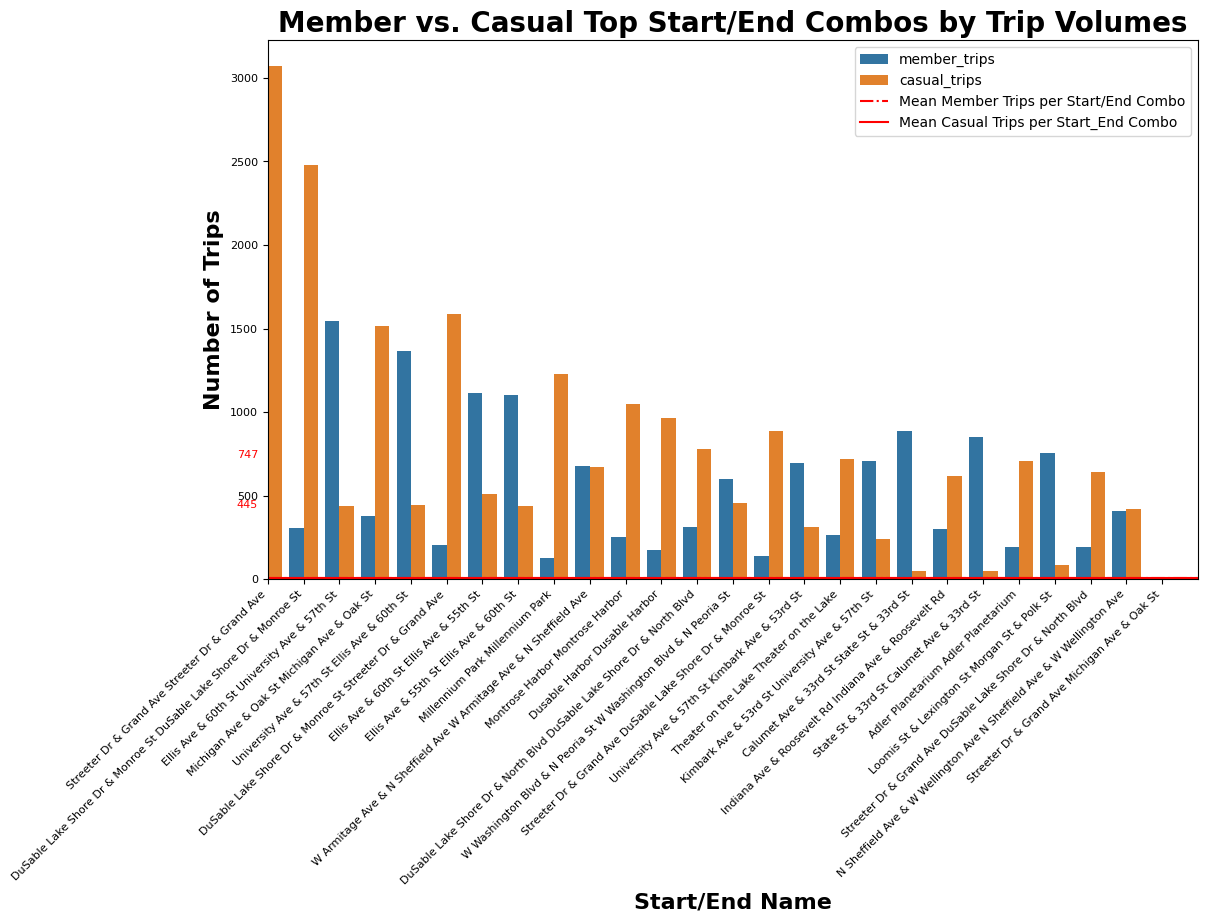

6.068317454805877

In [77]:
# Check differences in top/bottom start and end station combos between Members and Casual Riders

df1 = df1.replace('nan', np.nan)
df1_nonull = df1.dropna()

start_end_name_vol = pd.DataFrame(df1_nonull['start_end_name'].value_counts().sort_values(ascending=False).reset_index())

start_end_mem_vol = df1_nonull[df1_nonull['member_casual'] == 'member']
start_end_mem_vol = pd.DataFrame(start_end_mem_vol['start_end_name'].value_counts().sort_values(ascending=False).reset_index())

start_end_name_vol = start_end_name_vol.merge(start_end_mem_vol,how='outer',on='start_end_name')
start_end_cas_vol = df1_nonull[df1_nonull['member_casual'] == 'casual']
start_end_cas_vol = pd.DataFrame(start_end_cas_vol['start_end_name'].value_counts().sort_values(ascending=False).reset_index())

start_end_name_vol = start_end_name_vol.merge(start_end_cas_vol,how='outer',on='start_end_name')
start_end_name_vol = start_end_name_vol.rename(columns={'count_x':'total_trips','count_y':'member_trips','count':'casual_trips'})
start_end_name_vol = start_end_name_vol.sort_values(by='total_trips',ascending=False)

display(start_end_name_vol)

start_end_order = start_end_name_vol['start_end_name']
start_end_name_vol = start_end_name_vol.drop(['total_trips'],axis=1).melt(id_vars='start_end_name')
start_end_name_vol = start_end_name_vol.fillna(value=0)
start_end_name_vol['value'] = start_end_name_vol['value'].astype(int)
start_end_name_vol['start_end_name'] = pd.Categorical(start_end_name_vol['start_end_name'],categories=start_end_order)
start_end_name_vol = start_end_name_vol.sort_values(by='start_end_name').reset_index(drop=True)

display(start_end_name_vol)

# Top Start/End Station Combos by Member/Casual Rider Barplot

plt.figure(figsize=(12,7))
ax = sns.barplot(x=start_end_name_vol['start_end_name'][:50], y=start_end_name_vol['value'][:50],hue=start_end_name_vol['variable'][:50])
ax.set_title("Member vs. Casual Top Start/End Combos by Trip Volumes",fontsize=20,fontweight='bold')
ax.set_xticks(range(0,25,1))
ax.set_xlim(0,25)
ax.set_xlabel("Start/End Name",fontsize=16,fontweight='bold')
ax.set_ylabel("Number of Trips",fontsize=16,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=8)
plt.xticks(rotation=45, horizontalalignment='right')
ax.legend()
plt.show()

In [299]:
# Check number of one-way vs. round trip trips for members vs. casual riders

df1_nonull = df1.dropna()

df1_mem = df1_nonull[df1_nonull['member_casual'] == 'member']
df1_cas = df1_nonull[df1_nonull['member_casual'] == 'casual']

mem_round_trp = df1_mem[df1_mem['start_station_id'] == df1_mem['end_station_id']]
print('\033[1mNumber of Member Round Trips:\033[0m',len(mem_round_trp))

mem_one_way = df1_mem[df1_mem['start_station_id'] != df1_mem['end_station_id']]
print('\033[1mNumber of Member One-Way Trips:\033[0m',len(mem_one_way))

print('\033[1mMember Round Trips %:\033[0m',round((45817/(45817+843826))*100,2),'%')
print('\033[1mMember One-Way Trips %:\033[0m',round((843826/(45817+843826))*100,2),'%')
print('\n')

cas_round_trp = df1_cas[df1_cas['start_station_id'] == df1_cas['end_station_id']]
print('\033[1mNumber of Casual Rider Round Trips:\033[0m',len(cas_round_trp))

cas_one_way = df1_cas[df1_cas['start_station_id'] != df1_cas['end_station_id']]
print('\033[1mNumber of Casual Rider One-Way Trips:\033[0m',len(cas_one_way))

print('\033[1mCasual Rider Round Trips %:\033[0m',round((59962/(59962+499282))*100,2),'%')
print('\033[1mCasual Rider One-Way Trips %:\033[0m',round((499282/(59962+499282))*100,2),'%')

Number of Member Round Trips: 45817
Number of Member One-Way Trips: 843826
Member Round Trips %: 5.15 %
Member One-Way Trips %: 94.85 %


Number of Casual Rider Round Trips: 59962
Number of Casual Rider One-Way Trips: 499282
Casual Rider Round Trips %: 10.72 %
Casual Rider One-Way Trips %: 89.28 %


In [316]:
# Check where Member and Casual round trips are occurring

mem_rt_vc_df = pd.DataFrame(mem_round_trp['start_station_id'].value_counts(normalize=True).reset_index())
mem_rt_vc_df['cumsum'] = mem_rt_vc_df['proportion'].cumsum()
print('\033[1mMember Round Trip Station Volumes:\033[0m')
display(mem_rt_vc_df[mem_rt_vc_df['cumsum'] <= 0.801])
print('\033[1mTotal # Member Round Trip Stations:\033[0m',len(mem_rt_vc_df))
print('\n')

cas_rt_vc_df = pd.DataFrame(cas_round_trp['start_station_id'].value_counts(normalize=True).reset_index())
cas_rt_vc_df['cumsum'] = cas_rt_vc_df['proportion'].cumsum()
print('\033[1mCasual Rider Round Trip Station Volumes:\033[0m')
display(cas_rt_vc_df[cas_rt_vc_df['cumsum'] <= 0.801])
print('\033[1mTotal # Casual Rider Round Trip Stations:\033[0m',len(cas_rt_vc_df))
print('\n')

print('\033[1mMember Round Trip Stations Not In The Set of Casual Rider Round Trip Stations:\033[0m')
print(set(mem_rt_vc_df['start_station_id']).difference(set(cas_rt_vc_df['start_station_id'])))
print(len(set(mem_rt_vc_df['start_station_id']).difference(set(cas_rt_vc_df['start_station_id']))))

print('\033[1mCasual Rider Round Trip Stations Not In The Set of Member Round Trip Stations:\033[0m')
print(set(cas_rt_vc_df['start_station_id']).difference(set(mem_rt_vc_df['start_station_id'])))
print(len(set(cas_rt_vc_df['start_station_id']).difference(set(mem_rt_vc_df['start_station_id']))))

Member Round Trip Station Volumes:


,start_station_id,proportion,cumsum
0,20254.0,0.014754,0.014754
1,20247.0,0.013117,0.027872
2,13022,0.011262,0.039134
3,20256.0,0.008927,0.048061
4,13042,0.008316,0.056376
...,...,...,...
291,13109,0.001179,0.795665
292,TA1306000007,0.001179,0.796844
293,356,0.001179,0.798023
294,TA1308000031,0.001179,0.799201


Total # Member Round Trip Stations: 952


Casual Rider Round Trip Station Volumes:


,start_station_id,proportion,cumsum
0,13022,0.051232,0.051232
1,13300,0.041343,0.092575
2,13042,0.025249,0.117825
3,13008,0.020513,0.138338
4,TA1308000012,0.017444,0.155782
...,...,...,...
270,15628,0.000851,0.797122
271,506,0.000851,0.797972
272,KA1504000079,0.000834,0.798806
273,KA1503000002,0.000834,0.799640


Total # Casual Rider Round Trip Stations: 1136


Member Round Trip Stations Not In The Set of Casual Rider Round Trip Stations:
{'1213.0', '1271.0', '581', '1132.0', '1215.0', '973', '567', '966', '692', '890', '1257.0', '1018', '958', '856', '20217', '569', '496', '1263.0', 'OH Charging Stx - Test', '15599', '1023', '877', '735', '550', '6.21.23 OLD HASTINGS', '547', '876', 'KA1504000082', '601', '863', '1147.0', '15597', '18025', '1128.0', '858', '1110.0'}
36
Casual Rider Round Trip Stations Not In The Set of Member Round Trip Stations:
{'20133', '1254.0', '1125.0', '1013', '1091.0', '1145.0', '20227', '1251.0', '1246.0', '1027', '20129', '800', '1238.0', '743', '871', '763', '1074.0', '20228', '667', '20230', '1274.0', '324', '586', '417', '706', '552', '400', '20116', 'KA1503000001', '885', '20218', '696', '504', '893', '1157.0', '1216.0', 'KA1504000168', '1136.0', '789', '1144.0', '793', '1232.0', '20244', '712', '522', '395', '542', '603', '20221', '20101', '304', '16950', '576',

Member Average Trip Duration: 0 days 00:08:26.007332878
Casual Rider Average Trip Duration: 0 days 00:11:11.748132404


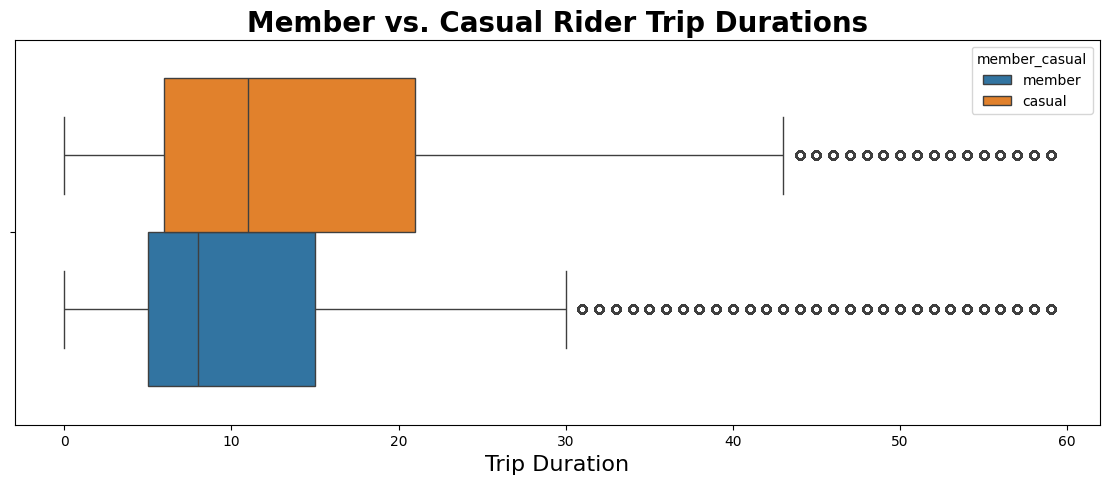

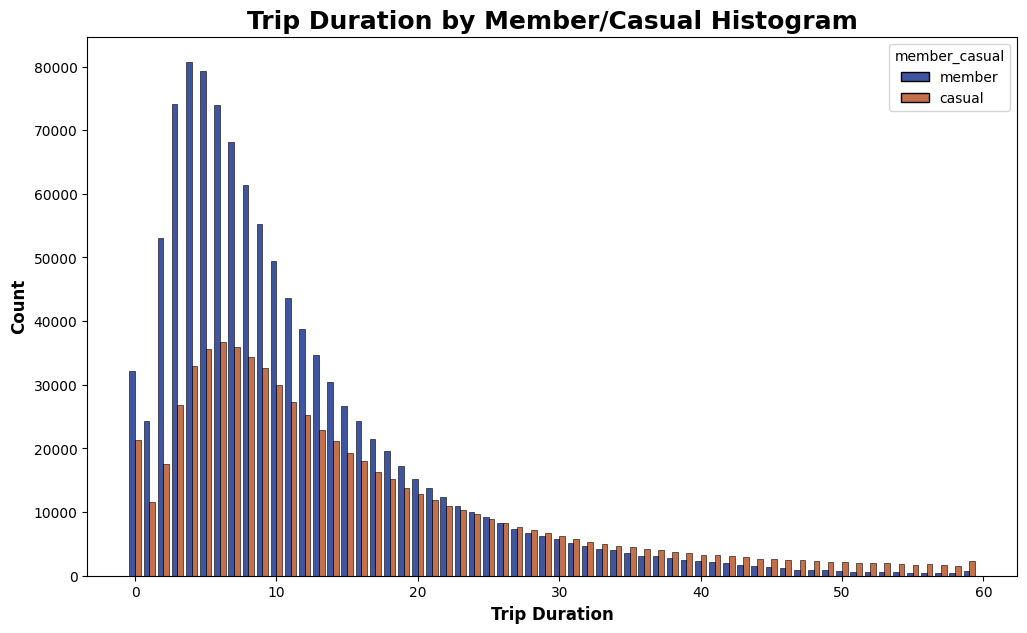

In [21]:
# Check differences in trip durations for Members vs. Casual Riders

df1_mem = df1[df1['member_casual'] == 'member']
df1_cas = df1[df1['member_casual'] == 'casual']

print('\033[1mMember Average Trip Duration:\033[0m',df1_mem['duration'].mean())
print('\033[1mCasual Rider Average Trip Duration:\033[0m',df1_cas['duration'].mean())

# Number of Projects by AVG Monthly Hours Boxplot

df1['duration'] = ((df1['duration'].dt.total_seconds()) % 3600) // 60

plt.figure(figsize=(14,5))
ax = sns.boxplot(x=df1['duration'],hue=df1['member_casual'],orient="h");
plt.title('Member vs. Casual Rider Trip Durations',fontsize=20,fontweight='bold');
plt.xlabel('Trip Duration',fontsize=16,fontweight='bold');
ax.invert_yaxis()
plt.show()

# Trip Duration by Member/Casual Rider Histogram

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x='duration', 
                  hue='member_casual',
                  multiple='dodge',
                  discrete=1,
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Trip Duration',fontsize=12,fontweight='bold')
ax.set_ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Trip Duration by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.show()

In [32]:
# Fix formatting of the start and end time columns to only include the time

df1['start_time'] = df1['start_time'].astype(str).str.rsplit(' ')
df1['start_time'] = df1['start_time'].apply(lambda x: x[-1])

df1['end_time'] = df1['end_time'].astype(str).str.rsplit(' ')
df1['end_time'] = df1['end_time'].apply(lambda x: x[-1])

df1['start_time'] = pd.to_datetime(df1['start_time'],format="%H:%M:%S")
df1['end_time'] = pd.to_datetime(df1['end_time'],format="%H:%M:%S")

display(df1.head())
display(df1.info())


,ride_id,rideable_type,start_date,end_date,weekday,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02,2023-04-02,Sunday,1900-01-01 08:37:28,1900-01-01 08:41:37,4.0,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,41.8 -87.6,41.79 -87.6,41.79,-87.60,41.80,-87.60
1,34E4ED3ADF1D821B,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 11:29:02,1900-01-01 11:52:12,23.0,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,41.87 -87.65,41.93 -87.68,41.93,-87.68,41.87,-87.65
2,5296BF07A2F77CB5,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 08:41:22,1900-01-01 08:43:22,2.0,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,41.93 -87.66,41.93 -87.66,41.93,-87.66,41.93,-87.66
3,40759916B76D5D52,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 13:31:30,1900-01-01 13:35:09,3.0,W Armitage Ave & N Sheffield Ave,20254.0,NaN,NaN,41.92,-87.65,41.91,-87.65,member,41.92 -87.65,41.91 -87.65,41.91,-87.65,41.92,-87.65
4,77A96F460101AC63,electric_bike,2023-04-19,2023-04-19,Wednesday,1900-01-01 12:05:36,1900-01-01 12:10:26,4.0,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,41.91 -87.65,41.91 -87.63,41.91,-87.63,41.91,-87.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751035 entries, 0 to 1751034
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   start_date          datetime64[ns]
 3   end_date            datetime64[ns]
 4   weekday             object        
 5   start_time          datetime64[ns]
 6   end_time            datetime64[ns]
 7   duration            float64       
 8   start_station_name  object        
 9   start_station_id    object        
 10  end_station_name    object        
 11  end_station_id      object        
 12  start_lat           float64       
 13  start_lng           float64       
 14  end_lat             float64       
 15  end_lng             float64       
 16  member_casual       object        
 17  start_lat_lng       object        
 18  end_lat_lng         object        
 19  avg_end_lat         float64       
 20  av

None

Member Average Trip Time of Day: 1900-01-01 14:32:04.737839616
Member Median Trip Time of Day: 1900-01-01 15:30:05


Casual Rider Average Trip Time of Day: 1900-01-01 15:03:56.930430208
Casual Rider Median Trip Time of Day: 1900-01-01 15:49:54


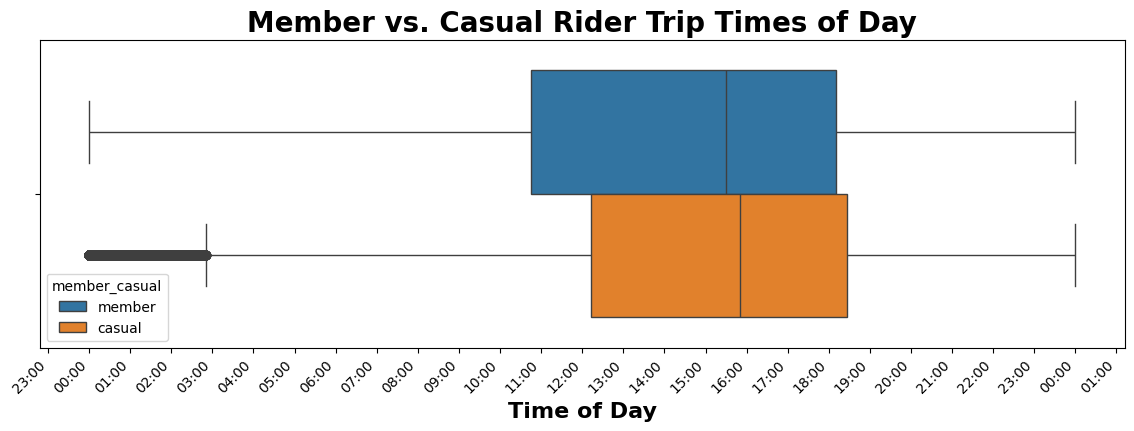

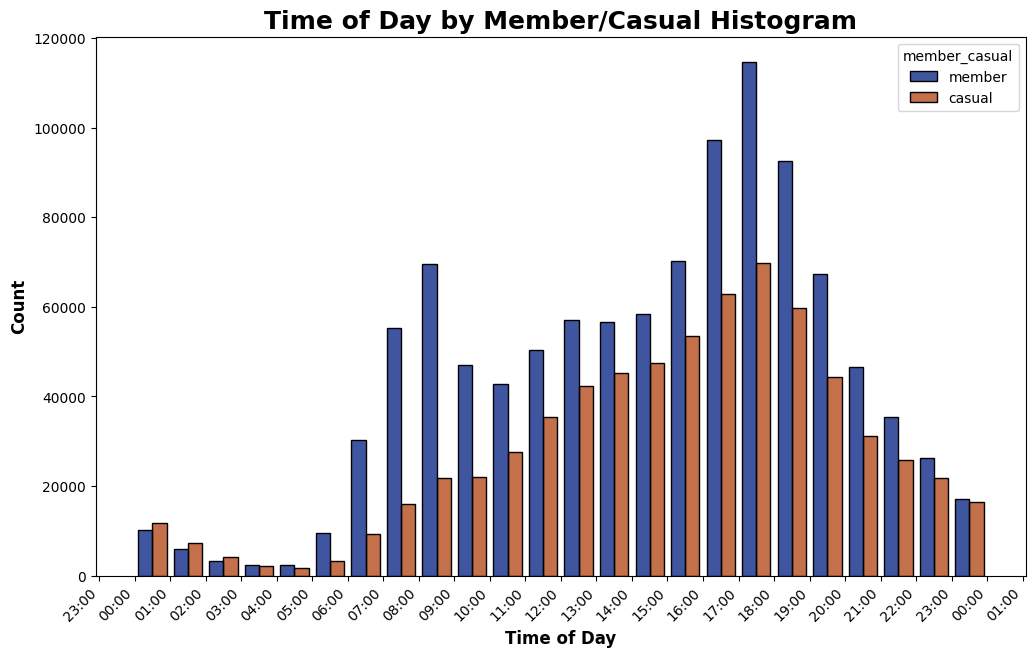

In [58]:
# Check differences in times of day for Member vs. Casual Rider trips

print('\033[1mMember Average Trip Time of Day:\033[0m',df1_mem['start_time'].mean())
print('\033[1mMember Median Trip Time of Day:\033[0m',df1_mem['start_time'].median())
print('\n')

print('\033[1mCasual Rider Average Trip Time of Day:\033[0m',df1_cas['start_time'].mean())
print('\033[1mCasual Rider Median Trip Time of Day:\033[0m',df1_cas['start_time'].median())

plt.figure(figsize=(14,4))
ax = sns.boxplot(x=df1['start_time'],hue=df1['member_casual'],orient="h");
plt.title('Member vs. Casual Rider Trip Times of Day',fontsize=20,fontweight='bold');
plt.xlabel('Time of Day',fontsize=16,fontweight='bold');
xformatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xformatter)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

# Trip Time of Day by Member/Casual Rider Histogram

#numhour = date2num(df1['start_time'])

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x=df1['start_time'], 
                  bins=24,
                  hue='member_casual',
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Time of Day',fontsize=12,fontweight='bold')
ax.set_ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Time of Day by Member/Casual Histogram',fontsize=18,fontweight='bold');
xformatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xformatter)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

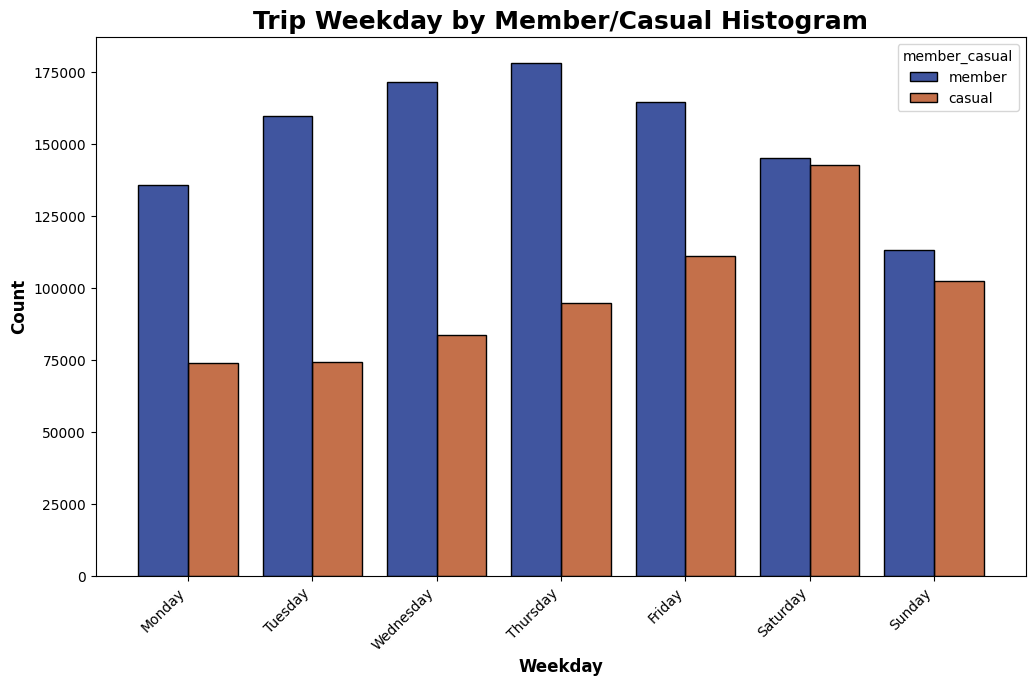

In [64]:
# Check difference in trips by Weekday for Members vs. Casual Riders

# Trip Weekday by Member/Casual Rider Histogram

df1['weekday'] = pd.Categorical(df1['weekday'],categories=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x=df1['weekday'],
                  hue='member_casual',
                  discrete=1,
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Weekday',fontsize=12,fontweight='bold')
ax.set_xticks(day_order)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Trip Weekday by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

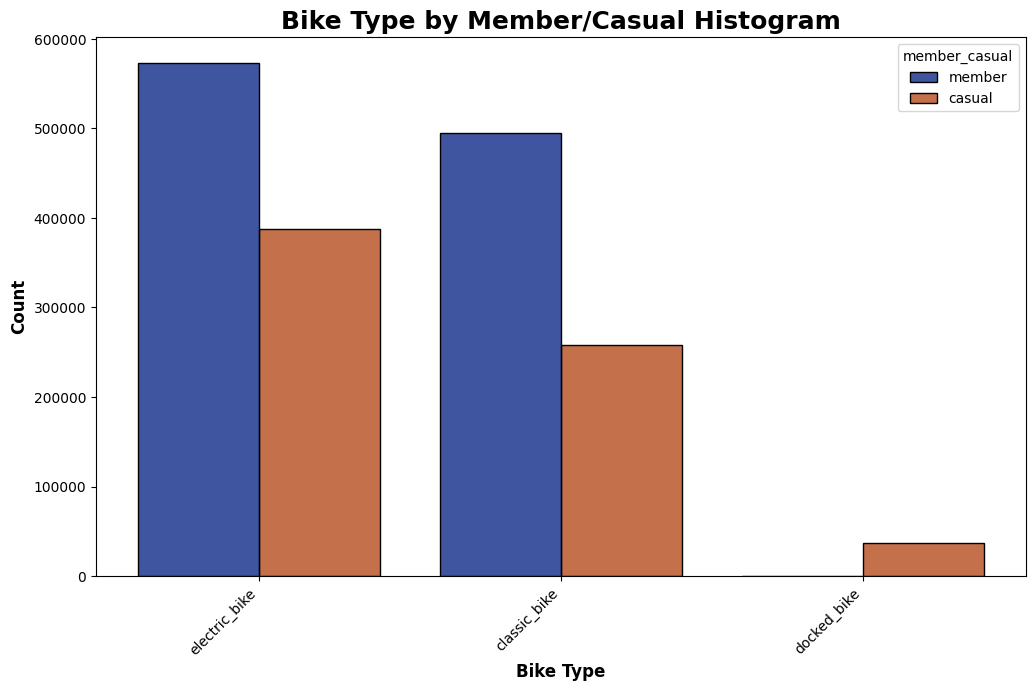

In [65]:
# Check difference in trips by bike type for Members vs. Casual Riders

# Trip Bike Type by Member/Casual Rider Histogram

plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x=df1['rideable_type'],
                  hue='member_casual',
                  discrete=1,
                  multiple='dodge',
                  shrink=.8,
                  palette='dark')
ax.set_xlabel('Bike Type',fontsize=12,fontweight='bold')
ax.set_ylabel('Count',fontsize=12,fontweight='bold')
plt.title('Bike Type by Member/Casual Histogram',fontsize=18,fontweight='bold');
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [1]:
# Define function that creates a performance metrics table based on F1 score optimization given a fitted model to 
# use to compare performance across all constructed models

def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'ROC/AUC': [roc_auc]
                         }
                        )

    return table

In [2]:
# Define function to calculate confusion matrix values and plot confusion matrix representing the averages of the
# values taken from each round of recall refit cross-validation for the best model

def make_cv_confusion_matrix(cv_object,y_train):
    
    '''Takes a fitted cv grid search object (i.e. dt_cv) and total number of outcome (y-variable) data points in the
    training dataset (i.e. y_train.shape[0]) and outputs a confusion matrix that represents averaged values from 
    all rounds of cross-validation'''
    
    # Create variable for total number of training set observations
    total_train_obs = y_train.shape[0]
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(cv_object.cv_results_)

    # Isolate the row of the df with the max(mean recall score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_recall'].idxmax(), :]
    
    # Isolate mean recall, precision, and accuracy scores from the best model's cross-validation
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Calculate values for the confusion matrix
    true_positives = ((precision * recall) * (total_train_obs - (accuracy * total_train_obs))) / (recall - (2 * recall * precision) + precision)
    false_positives = round((true_positives - (precision * true_positives)) / precision, 0)
    false_negatives = round((true_positives - (recall * true_positives)) / recall, 0)
    true_negatives = round((accuracy * total_train_obs) - true_positives, 0)
    true_positives = round(true_positives, 0)
    predictions_list = [true_negatives,false_positives,false_negatives,true_positives]
    predictions_matrix = np.array(predictions_list).reshape(2,2)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    ax = sns.heatmap(predictions_matrix, vmin=0, vmax=total_train_obs, annot=True, 
                     cmap = sns.color_palette("mako", as_cmap=True), fmt='g')
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    return plt.show()

In [3]:
# Create separate dataframe to use for constructing Random Forest model

df_rf = df1_encoded.copy()
df_rf['start_date'] = df_rf['start_date'].dt.strftime('%Y%m%d').astype(int)
df_rf['end_date'] = df_rf['end_date'].dt.strftime('%Y%m%d').astype(int)
df_rf['start_time'] = df_rf['start_time'].apply(lambda x: x.value)
df_rf['end_time'] = df_rf['end_time'].apply(lambda x: x.value)
df_rf = df_rf.dropna()

df_rf.info()
df_rf.head()

NameError: name 'df1_encoded' is not defined

In [22]:
# Define X and y variables for Random Forest model

X_rf = df_rf.drop(columns=['member_casual_casual','member_casual_member'])

y_rf = df_rf[['member_casual_member']]

display(X_rf.head())
display(y_rf.head())

,start_date,end_date,start_time,end_time,duration,start_station_name,start_station_id,end_station_name,end_station_id,start_end_name,start_end_id,start_lat,start_lng,end_lat,end_lng,avg_end_lat,avg_end_lng,avg_start_lat,avg_start_lng,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weekday_Sunday
0,20230402,20230402,-2208957752000000000,-2208957503000000000,4.0,1560,1412,1565,1408,139179,138148,41.80,-87.60,41.79,-87.60,41.79,-87.60,41.80,-87.60,False,False,True,False,False,False,False,False,False,True
1,20230419,20230419,-2208947458000000000,-2208946068000000000,23.0,1560,1412,1565,1408,139179,138148,41.87,-87.65,41.93,-87.68,41.93,-87.68,41.87,-87.65,False,False,True,False,False,True,False,False,False,False
2,20230419,20230419,-2208957518000000000,-2208957398000000000,2.0,1560,1412,1565,1408,139179,138148,41.93,-87.66,41.93,-87.66,41.93,-87.66,41.93,-87.66,False,False,True,False,False,True,False,False,False,False
3,20230419,20230419,-2208940110000000000,-2208939891000000000,3.0,1457,534,1565,1408,123236,53476,41.92,-87.65,41.91,-87.65,41.91,-87.65,41.92,-87.65,False,False,True,False,False,True,False,False,False,False
4,20230419,20230419,-2208945264000000000,-2208944974000000000,4.0,1560,1412,1565,1408,139179,138148,41.91,-87.65,41.91,-87.63,41.91,-87.63,41.91,-87.65,False,False,True,False,False,True,False,False,False,False


,member_casual_member
0,True
1,True
2,True
3,True
4,True


In [23]:
# Split X and y into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X_rf,y_rf, test_size=0.25, stratify=y_rf, random_state=42)

In [24]:
# Instantiate the Random Forest model

rf = RandomForestClassifier(random_state=42)

In [25]:
# Define ranges of cross-validation hyperparameters to use in GridSearch to choose the best model

cv_params = {'max_depth': [6,8,None], 
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3,4],
             'max_features': [1.0,'sqrt',0.7],
             'n_estimators': [100,300,500],
             'max_samples': [0.5,0.8,None]
             }  

# Define scoring metrics to calculate for the model

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Create the GridSearch object to perform GridSearch while fitting the model

# rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [31]:
# Perform GridSearch and fit the model; output elapsed time for this task

rf_cv.fit(X_train,y_train.values.ravel())

KeyboardInterrupt: 

In [ ]:
# Write pickle

#write_pickle(path, rf_cv, 'rf_cv')

In [ ]:
# Read pickle

rf_cv = read_pickle(path, 'rf_cv')

In [ ]:
# F1 score for the fitted model

print("F1 Score Best RF Model:",rf_cv.best_score_)

In [28]:
# Return full list of hyperparameters for the fitted model

print(rf_cv.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [29]:
# Identify the best combination of hyperparameters defined by the GridSearch

rf_cv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [30]:
# Full Grid Search CV Results for reference

rf_cv_full_results = pd.DataFrame(rf_cv.cv_results_)
rf_cv_full_results = rf_cv_full_results.sort_values(by='rank_test_f1',ascending=True)
#display(rf_cv_full_results)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
# Get performance metrics for how well the Random Forest model predicted the y_test observations

rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

In [ ]:
# Plot validation confusion matrix for the fitted Random Forest

make_cv_confusion_matrix(rf_cv,y_train)

In [ ]:
# Print actual outcomes from the train dataset

print("\033[1mActual Outcomes (left vs. stayed)\033[0m")
print(y_train.value_counts().to_string())

In [ ]:
# Identify most important X-variables (features) in the Random Forest model and put in a table

rf_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_)

rf_importances = rf_importances.rename(columns={0:"mean_dec_impurity"})
rf_importances.insert(0, "features", X_rf.columns)
rf_importances = rf_importances.sort_values(by='mean_dec_impurity',ascending=False).reset_index(drop=True)
rf_importances = rf_importances.iloc[:5,:]
display(rf_importances)

In [ ]:
# Plot feature importance for the Random Forest model; this plot shows the impact each predictor 
# variable has on the model for predicting the outcome variable

plt.figure(figsize=(14,7))
ax = sns.barplot(x=rf_importances['features'],y=rf_importances['mean_dec_impurity'])
plt.title("Random Forest Model Feature Importance (optimized for F1 score)",fontsize=20,fontweight='bold')
plt.xlabel("Features",fontsize = 15,fontweight='bold')
plt.ylabel("Mean Decrease in Impurity",fontsize = 15,fontweight='bold')
plt.xticks(rotation=45, horizontalalignment='right')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
# Define X and y variables to build the XGBoost model

X = df_logreg.drop(columns=['left'])

y = df_logreg['left']

display(X.head())
display(y.head())

In [ ]:
# Split X and y into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
# Instantiate the XGBoost model

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
# Define ranges of cross-validation hyperparameters to use in GridSearch to choose the best model

cv_params = {'max_depth': [6], 
             'min_child_weight': [0.4],
             'learning_rate': [0.1],
             'n_estimators': [100],
             'colsample_bytree': [0.4]
             }    

# Define scoring metrics to calculate for the model

scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}


# Create the GridSearch object to perform GridSearch while fitting the model

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [ ]:
# Perform GridSearch and fit the model; output elapsed time for this task

xgb_cv.fit(X_train, y_train)

In [ ]:
# Write pickle

# write_pickle(path, xgb_cv, 'xgb_cv')

In [ ]:
# Read pickle

# xgb_cv = read_pickle(path, 'xgb_cv')

In [ ]:
# Return full list of hyperparameters for the fitted model

xgb_cv.best_estimator_

In [ ]:
# Identify the best combination of hyperparameters defined by the GridSearch

xgb_cv.best_params_

In [ ]:
# Full Grid Search CV Results for reference

xgb_cv_full_results = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_full_results = xgb_cv_full_results.sort_values(by='rank_test_f1',ascending=True)
#display(xgb_cv_full_results)

In [ ]:
# Get performance metrics for how well the XGBoost model predicted the y_train observations

xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

In [ ]:
# Plot validation confusion matrix for the fitted XGBoost model

make_recall_cv_confusion_matrix(xgb_recall_cv,y_train)

In [ ]:
# Print actual outcomes from the train dataset

print("\033[1mActual Outcomes (left vs. stayed)\033[0m")
print(y_train.value_counts().to_string())

In [ ]:
# Plot feature importance for the XGBoost Recall optimized model; this plot shows the impact each predictor 
# variable has on the model for predicting the outcome variable

ax = plot_importance(xgb_recall_cv.best_estimator_,height = 0.4)
fig = ax.figure
fig.set_size_inches(18, 12)
plt.title('XGB Model Feature Importance (optimized for Recall)',fontsize = 28,fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('F Score',fontsize=17,fontweight='bold')
plt.ylabel('Features',fontsize=17,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=15)